# PHAS0030  Logbook
# Orbiting Bodies: The Dance of Stars
## 18044930

# Introduction
In this logbook you will see the steps taken to complete the project. The project is looking for stable orbits with multiple stars. To start with the earth orbiting the sun, then moving on to a two star orbiting system until the code for which plots an n body system is reached. Then once we have reached the point of n body systems we start finding interesting stable solutions.

# <a id="contents"></a> Contents

Due to the nature of the project the logbook has become quite long. In order to assist in the navigation of the logbook bellow are links to specific chapters of development. Each chapter is either a new date entry or the next step in the development process. To obtain new plots for n bodies all the cells that are required have been inserted in the "Final Code" chapter.

* [Earth-Sun Orbit](#1orbit1)
* [Earth-Sun Orbit Continued](#1orbit2)
* [Two Body Orbit](#2orbit1)
* [Two Body Orbit Continued](#2orbit2)
* [Three Bodies in Orbit](#3orbit1)
* ["n" Bodies in Orbit](#norbit1)
* [Final Code](#final)
* [Solutions](#sols)
* [Bibliography](#biblo)

#  <a id="1orbit1"></a> Earth-Sun Orbit
#### Date: 8/2/2020

I decided to start the project by attempting to simulate the orbit of the earth round the sun, in order to then be able to modify the code to then work for 3 bodies of the same mass. For help I went online and read Modelling the Three Body Problem in Classical Mechanics using Python [1] which gave me useful constants that helped set the foundations for my code. I also used Earth fact sheet [2] and Sun fact sheet [3] to model the specific Earth-Sun orbit.

In [19]:
#required imports

#to create an interactive plot
%matplotlib notebook    

from mpl_toolkits.mplot3d import Axes3D    #allows to create a 3D plot
import numpy as np                         #used to create arrays and opperate on them                
import matplotlib.pyplot as plt            #used to create a plot 

#### Solving Second Order Differential Equation
For a body orbiting around another we can use Newton's Law of gravitation where 
$$
\overrightarrow{F}= \frac{Gm_1m_2}{r^2}\hat{r}
$$
then combining this with Newton's second law of motion we get
$$
m_1\frac{d^2\overrightarrow{r_1}}{dt^2}= \frac{Gm_1m_2}{r^2}\hat{r}_{12}
$$
To solve this differential I will be using the fourth order Runge-Kutta. For this method it is required to change the second order differential equation into two linked first order differential equations.
For the differential equation at hand it gets split into the following:
$$
dr= v \ and \ dv = -\frac{Gm_2r_1}{r^2}\hat{r}_{12}
$$
In the cell bellow I have set up the function that sets up the two differential equations.

In [18]:
def PO1(r,v,t):
    """
    Imput value of possition, velocity,time
    Output the change of possition and velocity
    """
    x = r[0]
    y = r[1]
    z = r[2]
    vx = v[0]
    vy = v[1]
    vz = v[2]
    
    dr = v
    dv = -G*m2*r/(np.sqrt(x**2+y**2+z**2)**3)
    return np.array([dr,dv])

Bellow is the Runge-Kutta function which when used together with the pottential equation above creates an array of length N with every possition and velocity of the Earth as it travels around the Sun.

In [20]:
def RK4_solver(fun,r0,v0,dt,N):
    """Solve d2r/dt2 = fun(r,v,t) using fourth-order RK method.    
    Inputs:
    fun  f(r,v,t)
    r0   Initial location
    v0   Initial velocity
    dt   Spacing in time
    N    Number of steps    
    """
    #creates two empty arrays with dimensions (3,N+1)
    r = np.zeros(3*N+3).reshape(3,N+1)
    v = np.zeros(3*N+3).reshape(3,N+1)
    t = np.zeros(N+1)
    #imputs initial conditions into empty arrays
    r[0][0] = r0[0]
    r[1][0] = r0[1]
    r[2][0] = r0[2]
    
    v[0][0] = v0[0]
    v[1][0] = v0[1]
    v[2][0] = v0[2]
    
    #start of 4th order RK
    t[0] = 0
    valr= r0
    valv= v0
    
    for i in range(N):
        #calculates the next value of r and v
        k1 = dt*fun(valr,valv,t[i])
        k2 = dt*fun(valr+0.5*k1[0],valv+0.5*k1[1],t[i]+0.5*dt)
        k3 = dt*fun(valr+0.5*k2[0],valv+0.5*k2[1],t[i]+0.5*dt)
        k4 = dt*fun(valr+k3[0],valv+k3[1],t[i]+dt)
        valr=valr+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        valv=valv+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        
        #adds value calculated to empty array
        r[0][i+1] = valr[0]
        r[1][i+1] = valr[1]
        r[2][i+1] = valr[2]
        
        v[0][i+1] = valv[0]
        v[1][i+1] = valv[1]
        v[2][i+1] = valv[2]
        
        t[i+1]=t[i]+dt
    return r, v, t

### Constants
For this notebook I will start in SI units as its easier to build a clearer picture; for the stable orbits at the end the initial conditions are given assuming G and the mass of the bodies are 1, we will correct for this later.

In [21]:
G=6.67408e-11           #N-m2/kg2 Newtons

#Reference quantities
m2=1.989e+30            #kg   mass of the sun
r_nd=147.62e+10         #m    orbit radius of earth  (this was not correct but is corrected later)
v_nd=3000               #m/s  relative velocity of earth around the sun
t_nd=365*24*60*60       #s    orbit period 

dt=24*60*60             #dt   1 day
N=int(t_nd/dt)          #     number of steps

Bellow I'll be plotting the simulation of the earth orbiting around the sun.

<IPython.core.display.Javascript object>


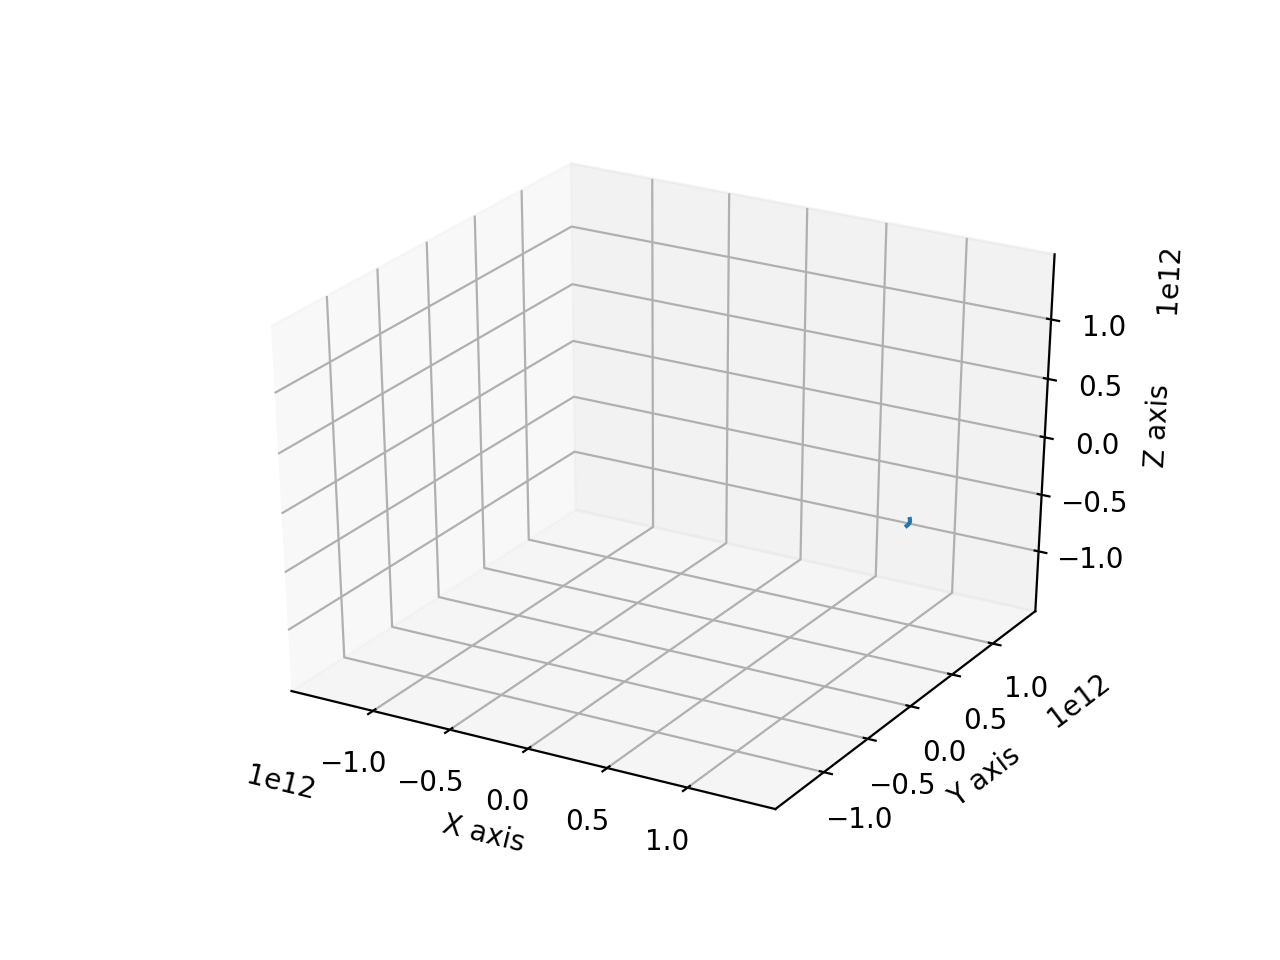

Text(0.5, 0, 'Z axis')

In [22]:
r0 = r_nd*np.array([1,0,0])       #sets radius equal to that of Earth's orbit
v0 = v_nd*np.array([0,1,0])       #sets velocity equal to that of Earth

r,v,t=RK4_solver(PO1,r0,v0,dt,N)  #computes all values of possition and velocity of Earth

#seperates x,y,z coordinates
x= r[0]
y=r[1]
z=r[2]

#creates plot
fig1 = plt.figure()
ax = fig1.gca(projection='3d')
ax.plot(x, y,z)
ax.set_xlim(-r_nd*1,r_nd*1)
ax.set_ylim(-r_nd*1,r_nd*1)
ax.set_zlim(-r_nd*1,r_nd*1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

* [Back to Contents](#contents)

#  <a id="1orbit2"></a> Earth-Sun Orbit Continued
#### Date: 15/2/2020
The plot shows a small section of a full orbit, so in the next cell I try increasing the number of steps made.

<IPython.core.display.Javascript object>


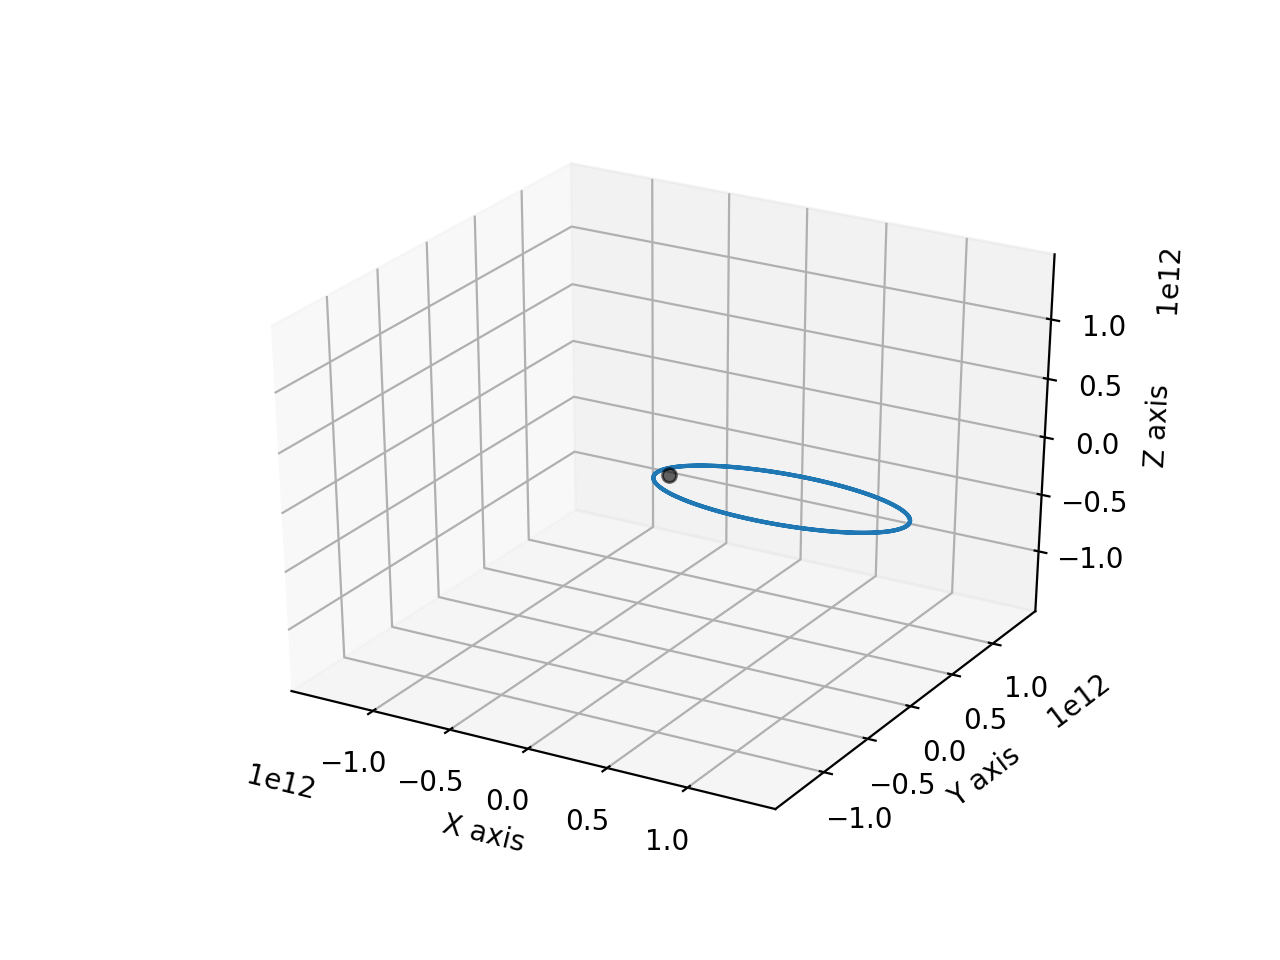

In [23]:
N2=N*25                             #multiplied the previous N by 25
r,v,t=RK4_solver(PO1,r0,v0,dt,N2)   #computed the same thing just with more steps

x= r[0]
y=r[1]
z=r[2]

fig2 = plt.figure()
ax = fig2.gca(projection='3d')


ax.plot(x, y,z)
ax.set_xlim(-r_nd*1,r_nd*1)
ax.set_ylim(-r_nd*1,r_nd*1)
ax.set_zlim(-r_nd*1,r_nd*1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

#to help see if orbit was correct I entered possition of the Sun
ax.plot([0], [0], [0], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)

plt.show()

### Plot of Earth-Sun Orbit
Inspecting the plot it appears to be far too elliptical. Looking closely at the reference quantities, the radius of the earth is far too big. If we adjust this the elliptical orbit will apear more circular.

In [24]:
G=6.67408e-11           #N-m2/kg2 Newtons

#Reference quantities
m2=1.989e+30            #kg   mass of the sun
r_nd=147.62e+11         #m    orbit radius of earth
v_nd=3000               #m/s  relative velocity of earth around the sun
t_nd=365*24*60*60       #s    orbit period 

dt=24*60*60             #dt   1 day
N=int(t_nd/dt)          #     number of steps

<IPython.core.display.Javascript object>


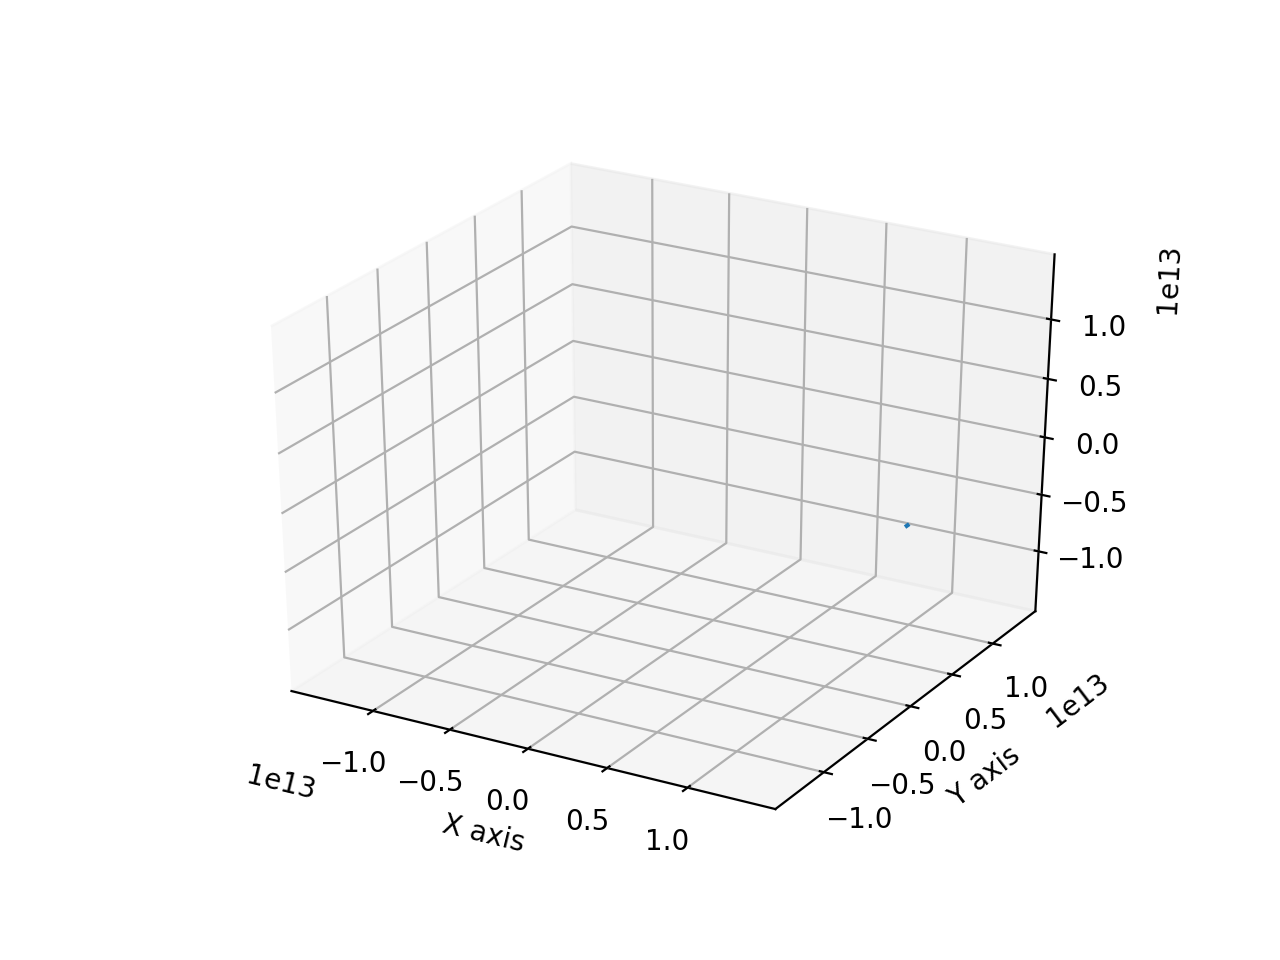

Text(0.5, 0, 'Y axis')

In [25]:
r0 = r_nd*np.array([1,0,0])       #sets radius equal to that of Earth's orbit
v0 = v_nd*np.array([0,1,0])       #sets velocity equal to that of Earth

r,v,t=RK4_solver(PO1,r0,v0,dt,N)  #computes all values of possition and velocity of Earth

x= r[0]
y=r[1]
z=r[2]

fig3 = plt.figure()
ax = fig3.gca(projection='3d')


ax.plot(x, y,z)
ax.set_xlim(-r_nd*1,r_nd*1)
ax.set_ylim(-r_nd*1,r_nd*1)
ax.set_zlim(-r_nd*1,r_nd*1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
#ax.set_zlabel('Z axis')


<IPython.core.display.Javascript object>


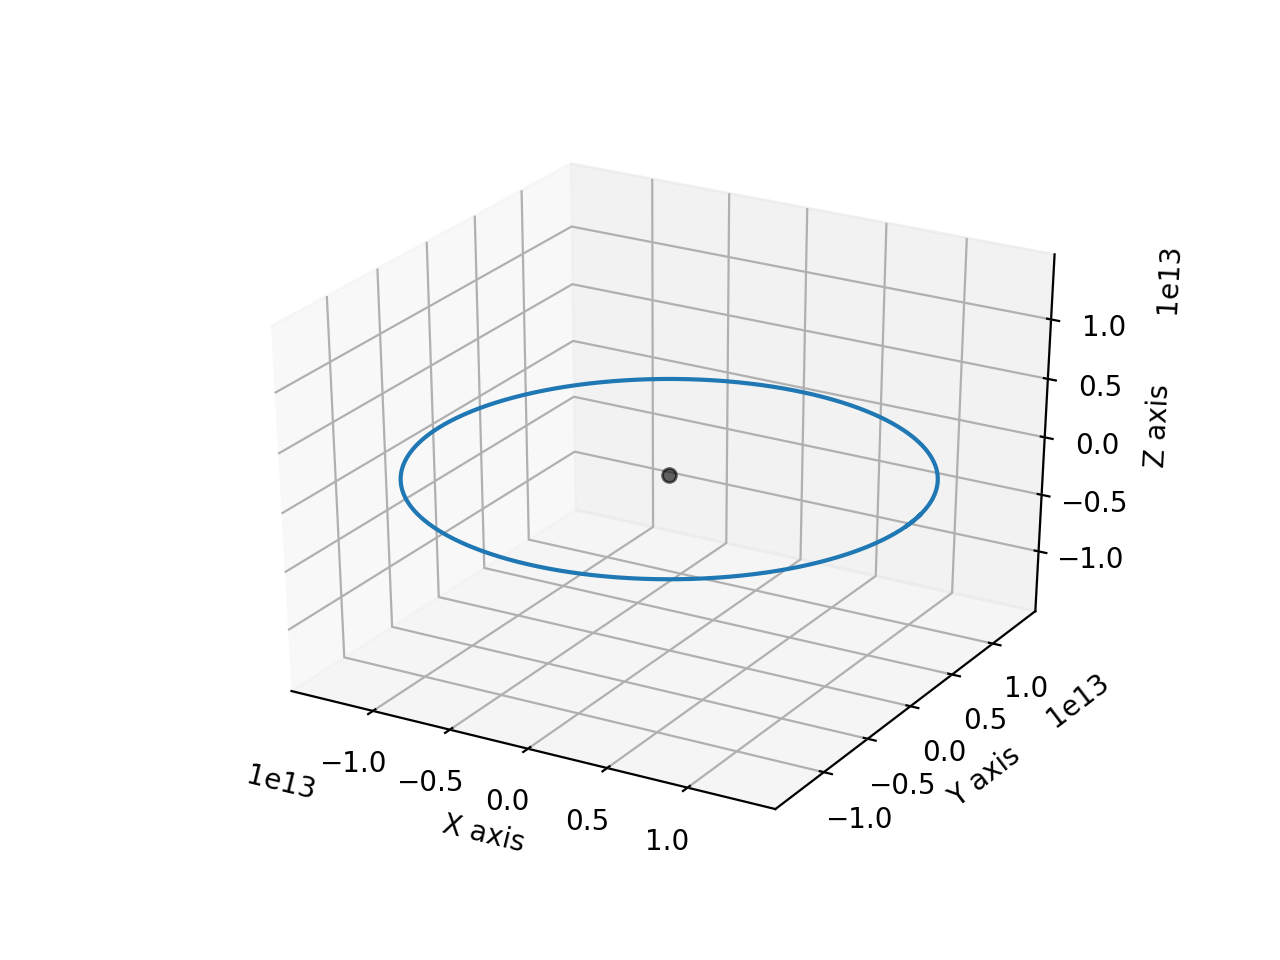

In [26]:
N2=N*1000                             #multiplied the previous N by 1000
r,v,t=RK4_solver(PO1,r0,v0,dt,N2)   #computed the same thing just with more steps

x= r[0]
y=r[1]
z=r[2]

fig4 = plt.figure()
ax = fig4.gca(projection='3d')


ax.plot(x, y,z)
ax.set_xlim(-r_nd*1,r_nd*1)
ax.set_ylim(-r_nd*1,r_nd*1)
ax.set_zlim(-r_nd*1,r_nd*1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

#to see if orbit was correct I entered possition of the Sun
ax.plot([0], [0], [0], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)


plt.show()

This plot looks a lot more like the observed orbit of the Earth around the Sun. At this point I can move on to the next stage in the project, modelling a two star orbit.

* [Back to Contents](#contents)

#  <a id="2orbit1"></a> Two Body Orbit
#### Date: 25/2/2020

The next step in the process of developing a model of three orbiting bodies is to get two bodies orbiting around each other. As for the Earth-Sun orbit we will be using the Runge-Kutta method again. Starting by creating a function finding the change in velocity and change in possition of both bodies.

In [12]:
def PO2(r,l,v,s,t):
    """
    Imput value of position, velocity for both stars and time
    Output change in position and velocity for both stars and time
    """
    #star 1
    dr = v
    dv = -G*m*(r-l)/(np.sqrt((r[0]-l[0])**2+(r[1]-l[1])**2+(r[2]-l[2])**2)**3)
    
    #star 2
    dl = s
    ds = -G*m*(l-r)/(np.sqrt((l[0]-r[0])**2+(l[1]-r[1])**2+(l[2]-r[2])**2)**3)    
    
    return np.array([dr,dl,dv,ds])

Bellow is an adaptation of the Runge-Kutta used earlier to now simulate two stars that orbit with each other.

In [13]:
def RK4_solver2(fun,r1,v1,r2,v2,dt,N):
    """Solve d2r/dt2 = fun(r,v,t) using fourth-order RK method.
    
    Inputs:
    fun  f(r,v,t)
    r0   Initial location
    v0   Initial velocity
    dt   Spacing in time
    N    Number of steps   
    
    Outputs:
    r    Locations of star 1 at every point in time
    v    Velocities of star 1 at every point in time
    l    Locations of star 2 at every point in time
    s    Velocities of star 2 at every point in time   
    t    array of each value of time in seconds
    """
    #creates two empty arrays with dimensions (3,N+1)
    r = np.zeros(3*N+3).reshape(3,N+1)
    v = np.zeros(3*N+3).reshape(3,N+1)
    l = np.zeros(3*N+3).reshape(3,N+1)
    s = np.zeros(3*N+3).reshape(3,N+1)    
    
    t = np.zeros(N+1)
    #imputs initial conditions into empty arrays
    r[0][0] = r1[0]
    r[1][0] = r1[1]
    r[2][0] = r1[2]
    
    v[0][0] = v1[0]
    v[1][0] = v1[1]
    v[2][0] = v1[2]
    
    l[0][0] = r2[0]
    l[1][0] = r2[1]
    l[2][0] = r2[2]
    
    s[0][0] = v2[0]
    s[1][0] = v2[1]
    s[2][0] = v2[2]   
    
    #start of 4th order RK
    t[0] = 0
    valr= r1
    valv= v1
    
    vall= r2
    vals= v2
    
    for i in range(N):
        #calculates the next value of r and v
        k1 = dt*fun(valr,vall,valv,vals,t)
        
        k2 = dt*fun(valr+0.5*k1[0],vall+0.5*k1[1],valv+0.5*k1[2],valv+0.5*k1[3],t+0.5*dt)
        
        k3 = dt*fun(valr+0.5*k2[0],vall+0.5*k2[1],valv+0.5*k2[2],vals+0.5*k2[3],t+0.5*dt)
        
        k4 = dt*fun(valr+k3[0],valr+k3[1],valv+k3[2],vals+k3[3],t+dt)
        
        valr=valr+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        valv=valv+(k1[2]+2*k2[2]+2*k3[2]+k4[2])/6
        
        vall=vall+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        vals=vals+(k1[3]+2*k2[3]+2*k3[3]+k4[3])/6   
        
        #adds value calculated to empty array
        r[0][i+1] = valr[0]
        r[1][i+1] = valr[1]
        r[2][i+1] = valr[2]
        
        v[0][i+1] = valv[0]
        v[1][i+1] = valv[1]
        v[2][i+1] = valv[2]
        l[0][i+1] = vall[0]
        l[1][i+1] = vall[1]
        l[2][i+1] = vall[2]
        
        s[0][i+1] = vals[0]
        s[1][i+1] = vals[1]
        s[2][i+1] = vals[2]  
       
        t[i+1]=t[i]+dt
        
    return r, v, l, s, t

Using the functions defined above we are now going to try and simulate two bodies that start their orbit at two opposite sides of the origin and have the same speed but in opposite directions.

<IPython.core.display.Javascript object>


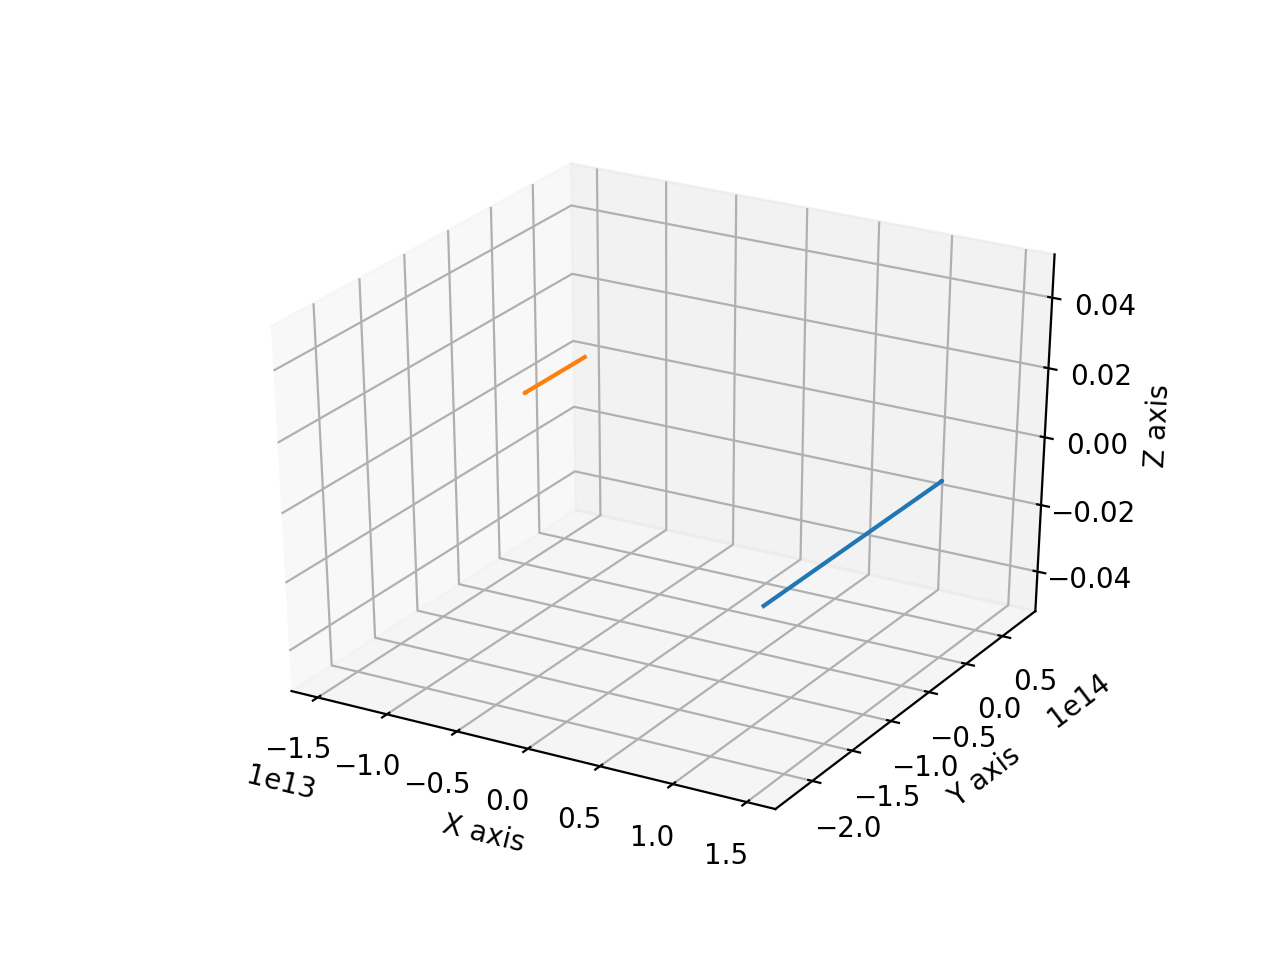

In [14]:
r1 = r_nd*np.array([1,0,0])
v1 = v_nd*np.array([0,1,0])
r2 = r_nd*np.array([-1,0,0])
v2 = v_nd*np.array([0,-1,0]) 
m  = 1.989e+30               #kg mass of the sun

r,v,l,s,t=RK4_solver2(PO2,r1,v1,r2,v2,dt,N)

fig5 = plt.figure()
ax = fig5.gca(projection='3d')

ax.plot(r[0],r[1],r[2])
ax.plot(l[0],l[1],l[2])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

This produces what appears to be two straight lines, which is not what was expected.

* [Back to Contents](#contents)

#  <a id="2orbit2"></a> Two Star Orbit Continued
#### Date 02/03/2020
I will first try and condense my code as according to my supervisor my current method is not efficient and isn't scalable.

In [15]:
#attempt 1 at reducing function for the potential
def PO2(r,v,t):
    """
    Imput value of position, velocity for both stars (length 6) and time 
    Output change in position and velocity for both stars and time
    """
    
    #star 1
    dr1 = v[:3]
    dv1 = -G*m*(r[:3]-r[3:])/(np.sqrt((r[0]-r[3])**2+(r[1]-r[4])**2+(r[2]-r[5])**2)**3)
    
    #star 2
    dr2 = v[3:]
    dv2 = -G*m*(r[3:]-r[:3])/(np.sqrt((r[3]-r[0])**2+(r[4]-r[1])**2+(r[5]-r[2])**2)**3)    



    dr = np.append(dr1,dr2)
    dv = np.append(dv1,dv2)
    return np.array([dr,dv])

At first all I did was remove the need of seperating out the values before doing the calculation.  

In [16]:
#attempt 2 at reducing function for the potential
def PO2(r,v,t):
    """
    Imput value of position, velocity for both stars and time
    Output change in position and velocity for both stars and time
    """   
    #star 1
    dr1 = v[:3]
    dv1 = -G*m/((r[:3]-r[3:])**2)
    
    #star 2
    dr2 = v[3:]
    dv2 = -G*m/((r[3:]-r[:3])**2)    
    
    dr = np.append(dr1,dr2)
    dv = np.append(dv1,dv2)
    return np.array([dr,dv])

The second attempt didn't work as a divide by zero error came up, but this is reduced considerably. 

In [17]:
#attempt at removing divide by 0 problem
def PO2(r,v,t):
    """
    Imput value of position, velocity for both stars and time
    Output change in position and velocity for both stars and time
    """
    
    #star 1
    dr1 = v[:3]
    dv1 = -G*m*(r[3:]-r[:3])/(np.sqrt((r[3:]-r[:3]).dot((r[3:]-r[:3])))**3)
    
    #star 2
    dr2 = v[3:]  
    dv2 = -G*m*(r[:3]-r[3:])/(np.sqrt((r[:3]-r[3:]).dot((r[:3]-r[3:])))**3)
    
    
    dr = np.append(dr1,dr2)
    dv = np.append(dv1,dv2)
    return np.array([dr,dv])

I have fixed the divide by zero problem by reverting back to finding out the magnitude of the radii, but this time using a numpy dot product in order to compute it faster.

In [18]:
def RK4_solver2(fun,r1,v1,r2,v2,dt,N):
    """Solve d2r/dt2 = fun(r,v,t) using fourth-order RK method.    
    Inputs:
    fun  f(r,v,t)
    r1,v1   Initial location and velocity of Star 1
    r2,v2   Initial location and velocity of Star 2
    dt      Spacing in time
    N       Number of steps       
    Outputs:
    r    Locations of star 1 and 2 at every point in time
    v    Velocities of star 1 and 2 at every point in time
    t    array of each value of time in seconds
    """
    #creates two empty arrays with dimensions (3,N+1)
    r = np.zeros(6*N+6).reshape(6,N+1)
    v = np.zeros(6*N+6).reshape(6,N+1)     
    t = np.zeros(N+1)
    #imputs initial conditions into empty arrays
    for i in range(3):
        r[i][0]=r1[i]
        r[i+3][0]=r2[i]
        v[i][0]=v1[i]       
        v[i+3][0]=v2[i] 
       
    #start of 4th order RK
    t[0] = 0
    valr= np.append(r1,r2)
    valv= np.append(v1,v2)
    
    for i in range(N):
        #calculates the next value of r and v
        k1 = dt*fun(valr,valv,t[i])        
        k2 = dt*fun(valr+0.5*k1[0],valv+0.5*k1[1],t[i]+0.5*dt)     
        k3 = dt*fun(valr+0.5*k2[0],valv+0.5*k2[1],t[i]+0.5*dt)        
        k4 = dt*fun(valr+k3[0],valv+k3[1],t[i]+dt)        
        valr=valr+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        valv=valv+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        
        #adds value calculated to empty array
        for k in range(6):
            r[k][i+1] = valr[k]    
            v[k][i+1] = valv[k]
       
        t[i+1]=t[i]+dt
        
    return r, v, t

In the adapted Runge-Kutta function above I have used multiple for loops in order to cut down the amount of lines used. 

<IPython.core.display.Javascript object>


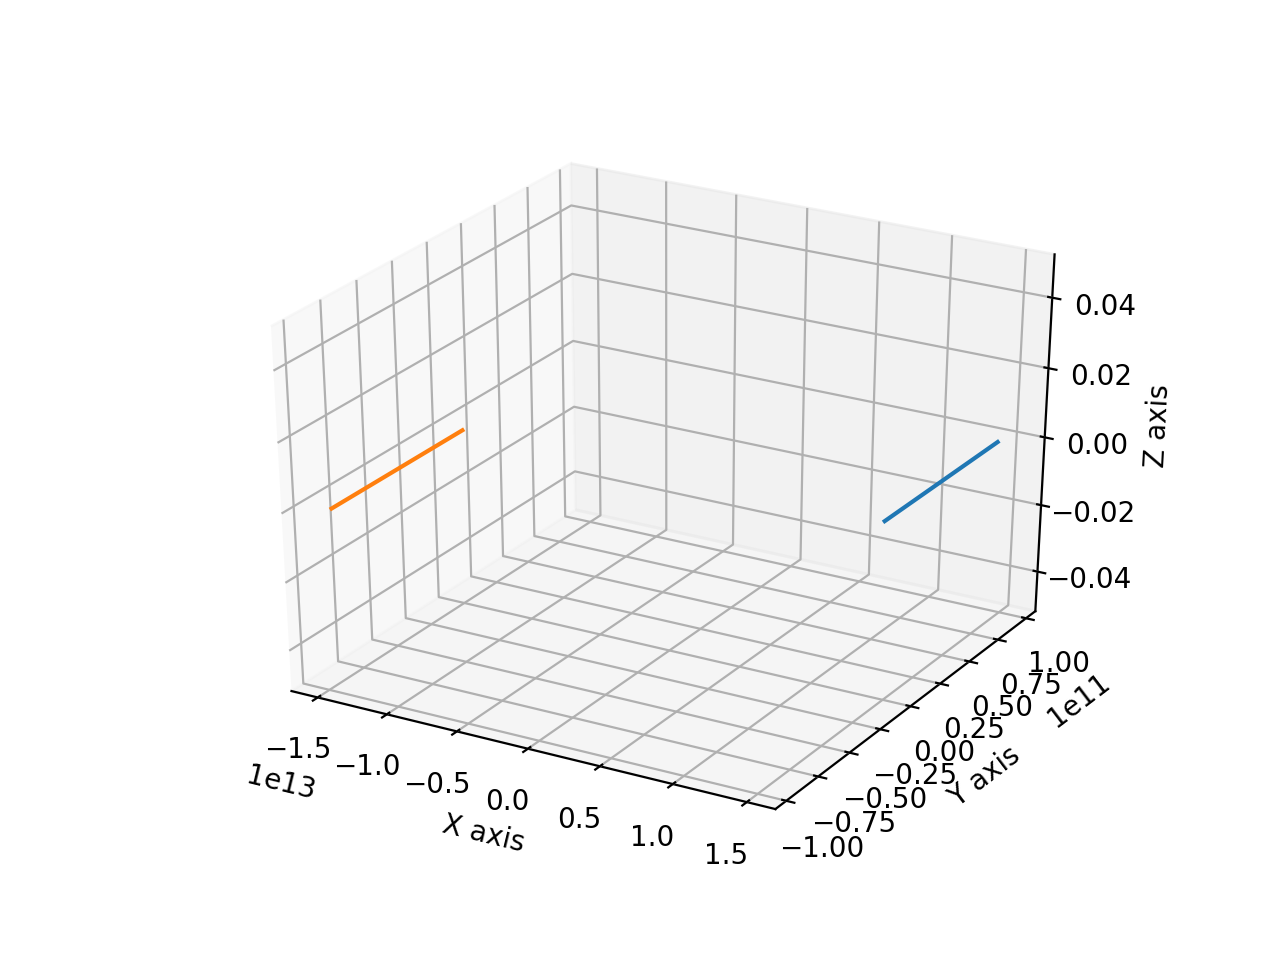

In [19]:
#plot of the same 2-star system
r1 = r_nd*np.array([1,0,0])
v1 = v_nd*np.array([0,1,0])
r2 = r_nd*np.array([-1,0,0])
v2 = v_nd*np.array([0,-1,0]) 
m  = 1.989e+30               #kg mass of the sun

r,v,t=RK4_solver2(PO2,r1,v1,r2,v2,dt,N)

fig6 = plt.figure()
ax = fig6.gca(projection='3d')

ax.plot(r[0],r[1],r[2])
ax.plot(r[3],r[4],r[5])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

The plot is the similar to the one above apart from the fact the direction of travel as changed direction. I believe the problem with this plot is that the velocity does not seem to update which causes the two stars just travel in a straight line. I will try increasing the number of steps to see if the velocities updated at some point. It was pointed out to me during a group discussion about the project that the two stars might be very far apart. So bellow I tried just letting the two stars fall in on each other.

<IPython.core.display.Javascript object>


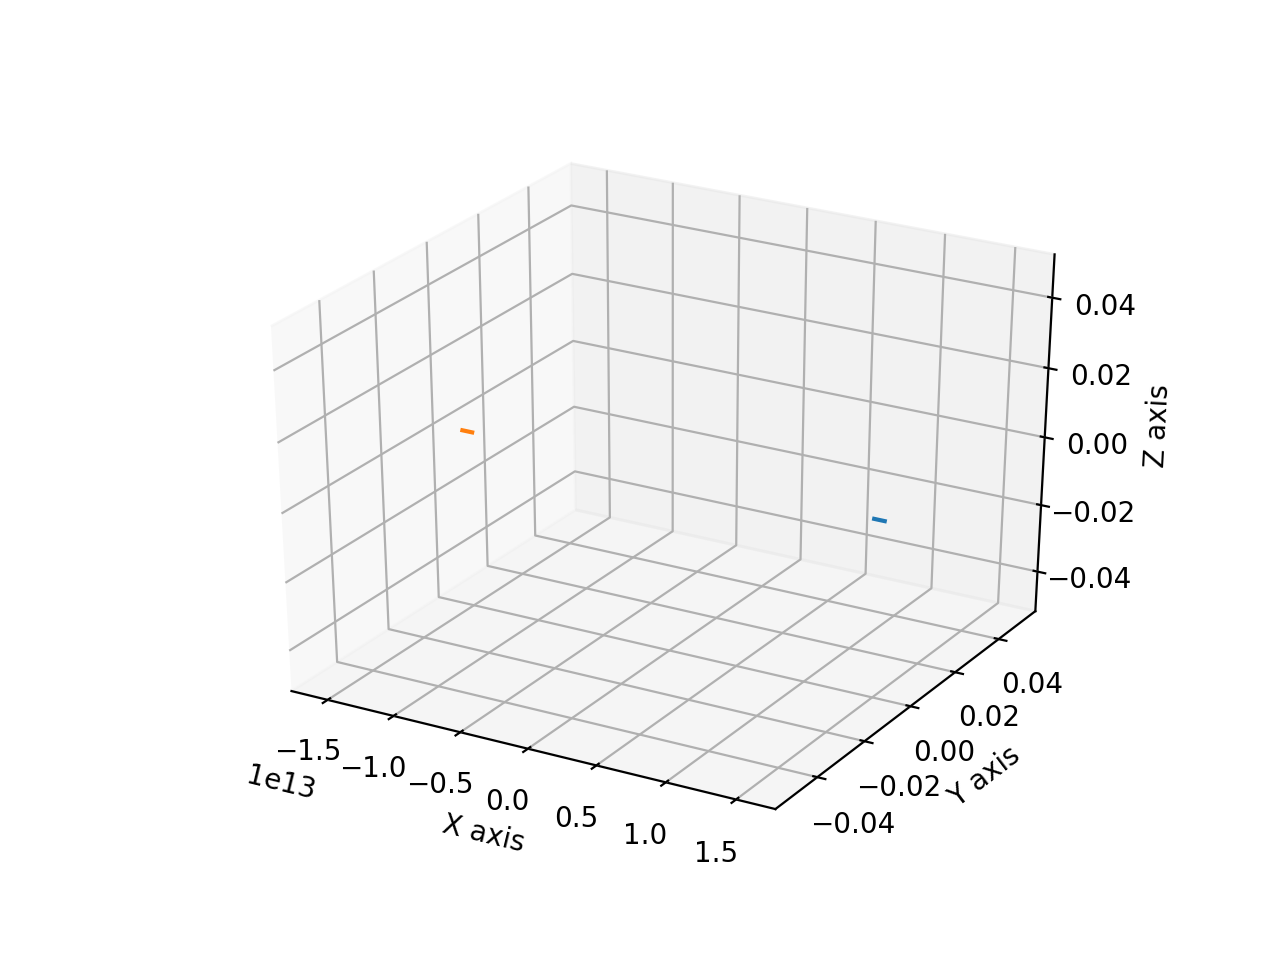

In [20]:
#plot of the same 2-star system
r1 = r_nd*np.array([1,0,0])
v1 = v_nd*np.array([0,0,0])
r2 = r_nd*np.array([-1,0,0])
v2 = v_nd*np.array([0,0,0]) 
m  = 1.989e+30               #kg mass of the sun
M=N*100
r,v,t=RK4_solver2(PO2,r1,v1,r2,v2,dt,M)

fig7 = plt.figure()
ax = fig7.gca(projection='3d')

ax.plot(r[0],r[1],r[2])
ax.plot(r[3],r[4],r[5])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

We can see in the above plot that over the course of a much longer time period they still haven't collided. Now I will try by resetting the constants and using new initial conditions. We are going to try and simulate the orbit of the bodies of the same mass as the Sun orbiting around the origin.

In [33]:
G=6.67408e-11           #N-m2/kg2 Newtons

#Reference quantities
m=1.989e+30                    #kg   mass of the sun
r_nd=5.326e+12                 #m    distance between stars in Alpha Centuri
v_nd=3000                      #m/s  relative velocity of earth around the sun
t_nd=8*79.91*365*24*3600*0.51  #s    orbital period of Alpha Centauri
 

dt=24*60*60*7                  #dt   1 day
N=int(t_nd/dt)                 #     number of steps

#mass of stars 1 & 2
m1 = 1*m
m2 = 1*m
#initial conditions
r1=r_nd*np.array([-0.5,0,0])     #m
r2=r_nd*np.array([0.5,0,0])      #m
v1=v_nd*np.array([0.01,0.01,0])  #m/s
v2=v_nd*np.array([-0.05,0,-0.1]) #m/s

I'm now going to modify my code so that I can use different masses for different stars. It was also made aware to me that using np.linealg.norm would be a more efficient way of finding the magnitude of arrays so will include this into my adaptation.

In [34]:
#accounting for stars of different masses
def PO2(r,v,m,t):
    """
    Imput value of position, velocity for both stars and time
    Output change in position and velocity for both stars and time
    """
    
    #star 1
    dr1 = v[:3] 
    dv1 = G*m[1]*(r[3:]-r[:3])/(np.linalg.norm(r[3:]-r[:3])**3)  
    
    #star 2
    dr2 = v[3:]  
    dv2 = G*m[0]*(r[:3]-r[3:])/(np.linalg.norm(r[:3]-r[3:])**3)  
    
    
    dr = np.append(dr1,dr2)
    dv = np.append(dv1,dv2)
    return np.array([dr,dv])

In [35]:
def RK4_solver2(fun,r1,v1,r2,v2,m1,m2,dt,N):
    """Solve d2r/dt2 = fun(r,v,t) using fourth-order RK method.    
    Inputs:
    fun  f(r,v,t)
    r1,v1   Initial location and velocity of Star 1
    r2,v2   Initial location and velocity of Star 2
    dt      Spacing in time
    N       Number of steps       
    Outputs:
    r    Locations of star 1 and 2 at every point in time
    v    Velocities of star 1 and 2 at every point in time
    t    array of each value of time in seconds
    """
    #creates two empty arrays with dimensions (3,N+1)
    r = np.zeros(6*N+6).reshape(6,N+1)
    v = np.zeros(6*N+6).reshape(6,N+1) 
    t = np.zeros(N+1)
    #imputs initial conditions into empty arrays
    for i in range(3):
        r[i][0]=r1[i]
        r[i+3][0]=r2[i]
        v[i][0]=v1[i]       
        v[i+3][0]=v2[i] 
       
    #start of 4th order RK
    t[0] = 0
    valr= np.append(r1,r2)
    valv= np.append(v1,v2)
    m   = np.append(m1,m2)
    
    for i in range(N):
        #calculates the next value of r and v
        k1 = dt*fun(valr,valv,m,t[i])        
        k2 = dt*fun(valr+0.5*k1[0],valv+0.5*k1[1],m,t[i]+0.5*dt)     
        k3 = dt*fun(valr+0.5*k2[0],valv+0.5*k2[1],m,t[i]+0.5*dt)        
        k4 = dt*fun(valr+k3[0],valv+k3[1],m,t[i]+dt)        
        valr=valr+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        valv=valv+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        
        #adds value calculated to empty array
        for k in range(6):
            r[k][i+1] = valr[k]    
            v[k][i+1] = valv[k]
       
        t[i+1]=t[i]+dt
        
    return r, v, t

<IPython.core.display.Javascript object>


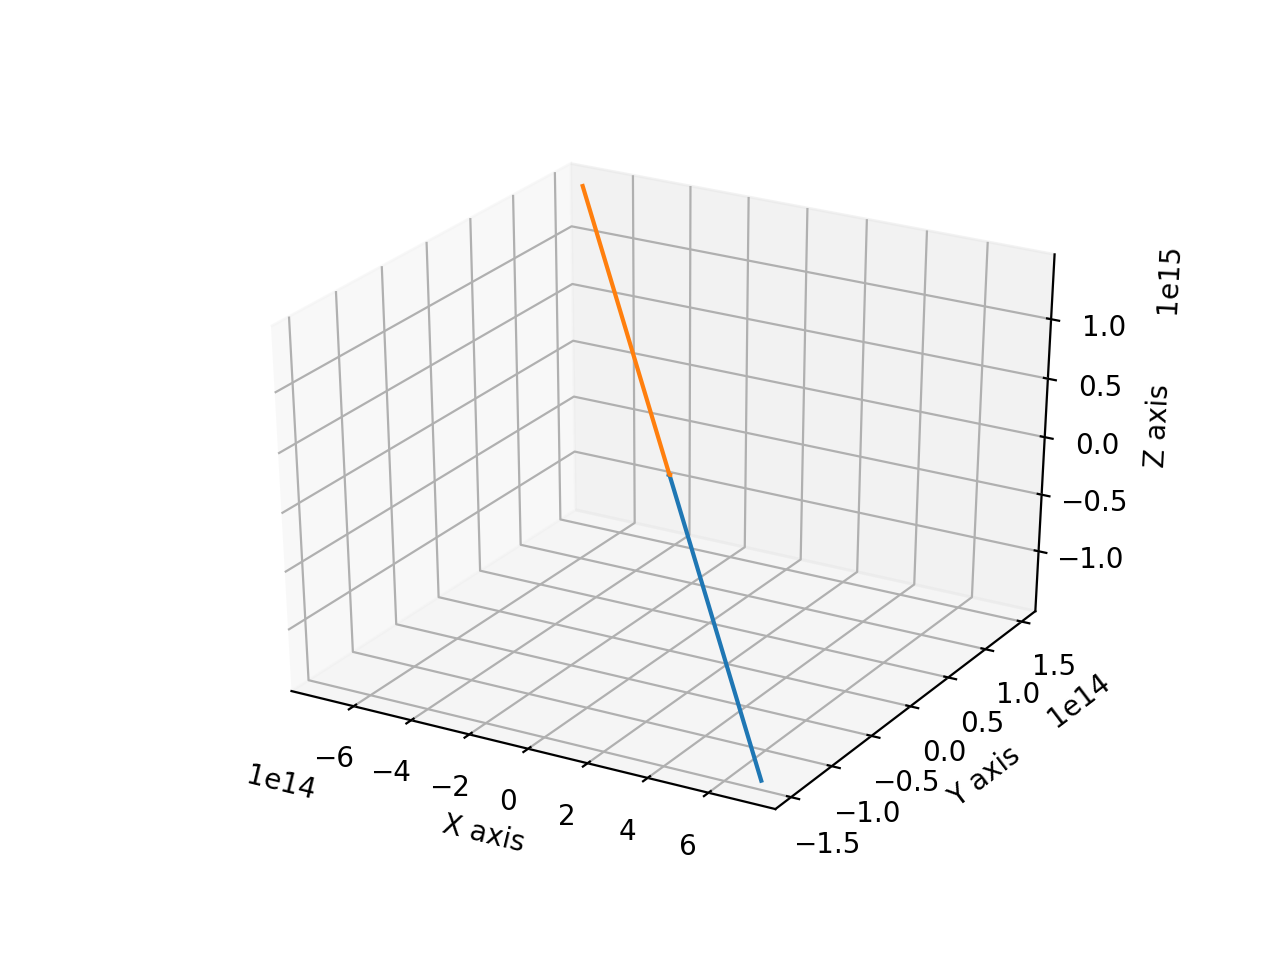

In [36]:

r,v,t=RK4_solver2(PO2,r1,v1,r2,v2,m1,m2,dt,N)

fig8 = plt.figure()
ax = fig8.gca(projection='3d')

ax.plot(r[0],r[1],r[2])
ax.plot(r[3],r[4],r[5])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

We can see that the orbits are colliding so we just need to get initial conditions correct. 

<IPython.core.display.Javascript object>


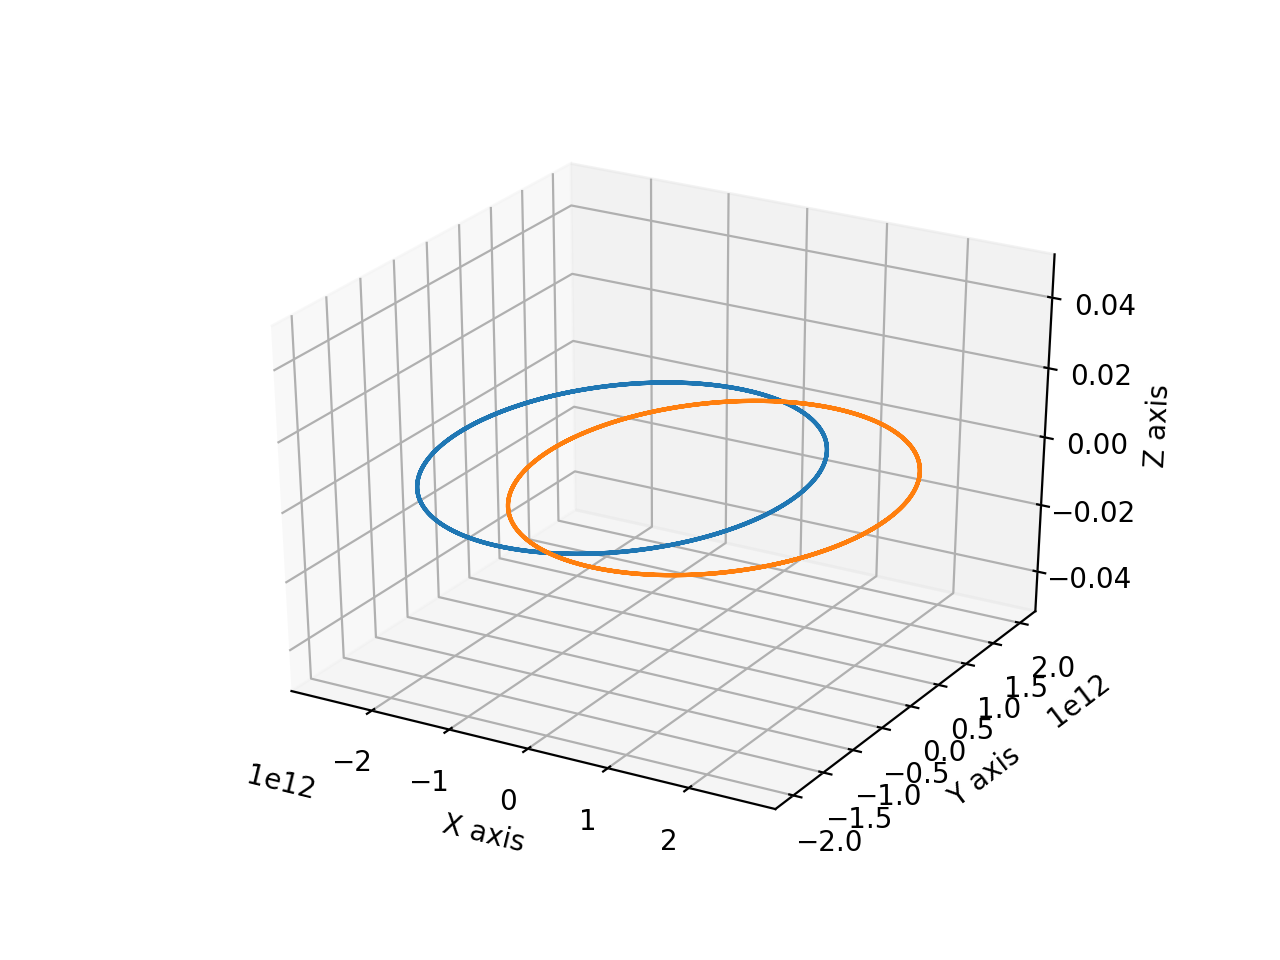

In [38]:
r1=r_nd*np.array([-0.5,0,0]) #m
r2=r_nd*np.array([0.5,0,0]) #m
v1=v_nd*np.array([0,1,0]) #m/s
v2=v_nd*np.array([0,-1,0]) #m/s

r,v,t=RK4_solver2(PO2,r1,v1,r2,v2,m1,m2,dt,N)

fig9 = plt.figure()
ax = fig9.gca(projection='3d')


ax.plot(r[0],r[1],r[2])
ax.plot(r[3],r[4],r[5])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

As we can see the orbit of the two bodies with the same mass producess two orbits with a shared focal point which is to be expected.
* [Back to Contents](#contents)

#  <a id="3orbit1"></a> Three Bodies in Orbit
#### Date 02/03/2020

The code works for two bodies so now I'm going to try and create a code that works for the orbits of three bodies. This becomes more tricky as we need to consider an extra body acting on each of the bodies.

In [39]:
def PO3(r,v,m,t):
    """
    Imput value of position, velocity for 3 stars and time
    Output change in position and velocity for 3 stars and time
    """
    
    #star 1
    dr1 = v[:3] 
    dv12 = G*m[1]*(r[3:6]-r[:3])/(np.linalg.norm(r[3:6]-r[:3])**3) 
    dv13 = G*m[2]*(r[6:]-r[:3])/(np.linalg.norm(r[6:]-r[:3])**3)
    dv1= dv12+dv13
    
    #star 2
    dr2 =  v[3:6]  
    dv21 = G*m[0]*(r[:3]-r[3:6])/(np.linalg.norm(r[:3]-r[3:6])**3)
    dv23 = G*m[2]*(r[6:]-r[3:6])/(np.linalg.norm(r[6:]-r[3:6])**3)
    dv2= dv21+dv23
    
    #star 3
    dr3 = v[6:] 
    dv31 = G*m[0]*(r[0:3]-r[6:])/(np.linalg.norm(r[0:3]-r[6:])**3) 
    dv32 = G*m[1]*(r[3:6]-r[6:])/(np.linalg.norm(r[3:6]-r[6:])**3)
    dv3= dv31+dv32
    
    dr = np.concatenate((dr1,dr2,dr3))
    dv = np.concatenate((dv1,dv2,dv3))
    return np.array([dr,dv])

In [40]:
def RK4_solver3(fun,r1,v1,r2,v2,r3,v3,m1,m2,m3,dt,N):
    """Solve d2r/dt2 = fun(r,v,t) using fourth-order RK method.    
    Inputs:
    fun  f(r,v,t)
    r1,v1   Initial location and velocity of Star 1
    r2,v2   Initial location and velocity of Star 2
    r3,v3   Initial location and velocity of Star 3
    m1,m2,m3 masses of three stars
    dt      Spacing in time
    N       Number of steps       
    Outputs:
    r    Locations of star 1,2 and 3 at every point in time
    v    Velocities of star 1,2 and 3 at every point in time
    t    array of each value of time in seconds
    """
    #creates two empty arrays with dimensions (3,N+1)
    r = np.zeros(9*N+9).reshape(9,N+1)
    v = np.zeros(9*N+9).reshape(9,N+1) 
    t = np.zeros(N+1)
    #imputs initial conditions into empty arrays
    for i in range(3):
        r[i][0]=r1[i]
        r[i+3][0]=r2[i]
        r[i+6][0]=r3[i]
        v[i][0]=v1[i]       
        v[i+3][0]=v2[i]
        v[i+6][0]=v3[i]
        
       
    #start of 4th order RK
    t[0] = 0
    valr= np.concatenate((r1,r2,r3))
    valv= np.concatenate((v1,v2,v3))
    m   = np.array([m1,m2,m3])
    
    for i in range(N):
        #calculates the next value of r and v
        k1 = dt*fun(valr,valv,m,t[i])        
        k2 = dt*fun(valr+0.5*k1[0],valv+0.5*k1[1],m,t[i]+0.5*dt)     
        k3 = dt*fun(valr+0.5*k2[0],valv+0.5*k2[1],m,t[i]+0.5*dt)        
        k4 = dt*fun(valr+k3[0],valv+k3[1],m,t[i]+dt)        
        valr=valr+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        valv=valv+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        
        #adds value calculated to empty array
        for k in range(9):
            r[k][i+1] = valr[k]    
            v[k][i+1] = valv[k]
       
        t[i+1]=t[i]+dt
        
    return r, v, t

<IPython.core.display.Javascript object>


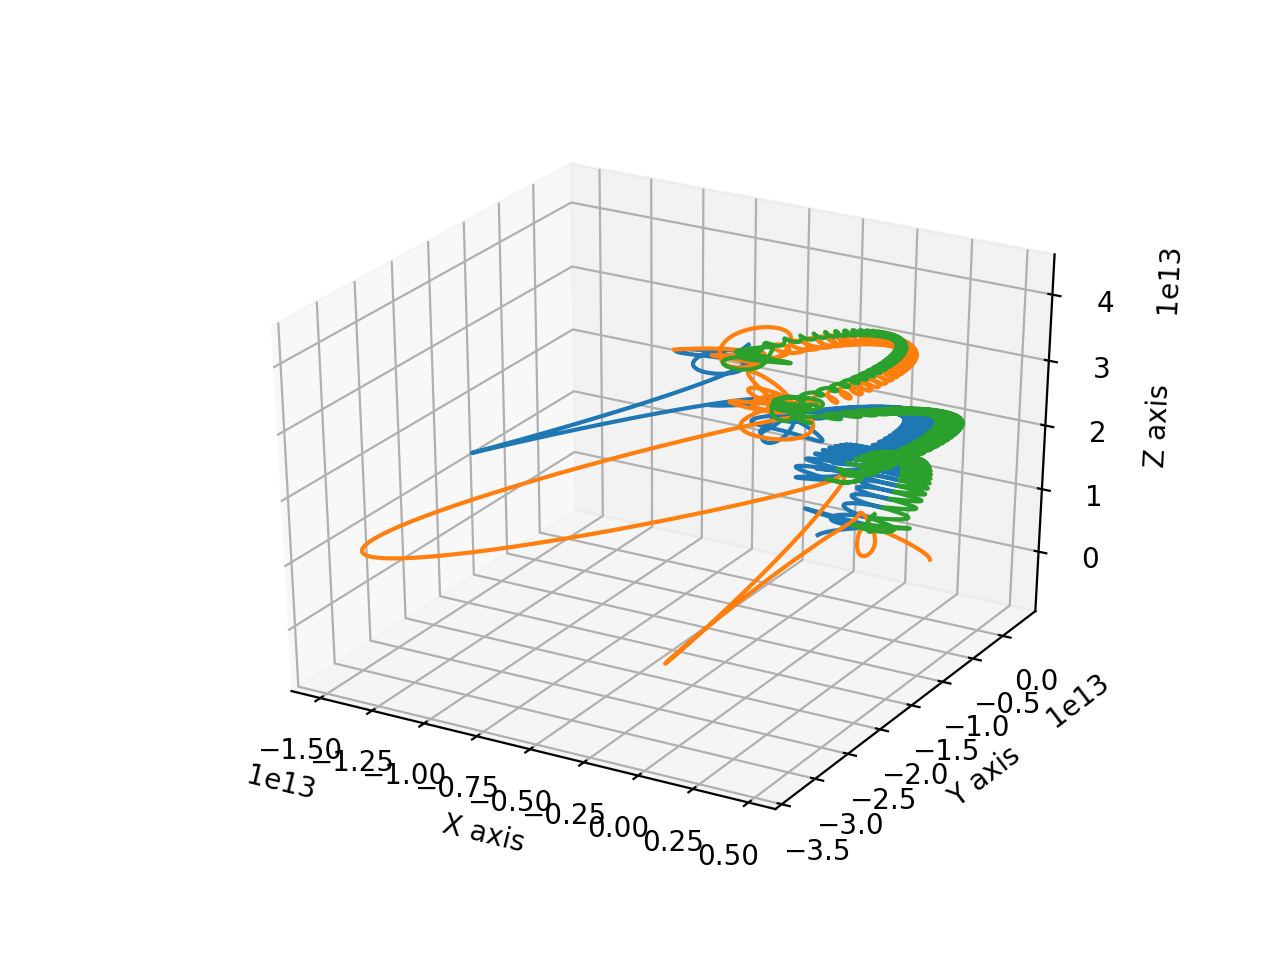

Text(0.5, 0, 'Z axis')

In [41]:
r1=r_nd*np.array([-0.5,0,0]) #m
r2=r_nd*np.array([0.5,0,0]) #m
r3=r_nd*np.array([0,0,1]) #m
v1=v_nd*np.array([0,1,0]) #m/s
v2=v_nd*np.array([0,0,1]) #m/s
v3=v_nd*np.array([0,-1,0]) #m/s
m1 = 1.5*m
m2 = 1*m
m3 = 2*m
r,v,t=RK4_solver3(PO3,r1,v1,r2,v2,r3,v3,m1,m2,m3,dt,N*6)

fig10 = plt.figure()
ax = fig10.gca(projection='3d')

ax.plot(r[0],r[1],r[2])
ax.plot(r[3],r[4],r[5])
ax.plot(r[6],r[7],r[8])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


This is showing the path of the three stars just before the orbits collapse, proving that the orbits are so close chaos at all times. This plot is going to be useful in testing the final piece of code, where we attempt at creating a code that works for a system of n-bodies, by seeing if it produces the same plot.
* [Back to Contents](#contents)

#  <a id="norbit1"></a> "n" Stars in Orbit
#### Date- 9/3/2020
Trying to adapt code into working for n bodies, by generalising the three body code allowing for more bodies, using multiple for loops. 

In [42]:
def POn(r,v,m,n,t):
    """
    Imput value of position, velocity for 3 stars and time
    Output change in position and velocity for 3 stars and time
    """    
    dr = np.zeros((n*3))
    dv = np.zeros((n*3))
    dvi= np.zeros((n,n,3))
    
    for i in range(n):      
        dr[i*3:3*(i+1)] = v[i*3:3*(i+1)]
        for j in range(n):
            if (i == j):
                continue
            else:
                dvi[i,j] = G*m[j]*(r[j*3:3*(j+1)]-r[i*3:3*(i+1)])
                dvi[i,j] /=(np.linalg.norm(r[j*3:3*(j+1)]-r[i*3:3*(i+1)])**3)
                dv[i*3:3*(i+1)] = np.sum(dvi[i,j])
    return np.array([dr,dv])

In [43]:
def RK4_solvern(fun,n,d,s,m,dt,N):
    """Solve d2r/dt2 = fun(r,v,t) using fourth-order RK method.    
    Inputs:
    fun     f(r,v,t)
    r,v     Initial location and velocity of Star 1
    m       masses of three stars
    dt      Spacing in time
    N       Number of steps       
    Outputs:
    r    Locations of star 1,2 and 3 at every point in time
    v    Velocities of star 1,2 and 3 at every point in time
    t    array of each value of time in seconds
    """
    #creates two empty arrays with dimensions (3,N+1)
    r = np.zeros(3*n*(N+1)).reshape(3*n,N+1)
    v = np.zeros(3*n*(N+1)).reshape(3*n,N+1) 
    t = np.zeros(N+1)
    #imputs initial conditions into empty arrays
    for i in range(n*3):
            r[i][0] = d[i]
            v[i][0] = s[i]       
    #start of 4th order RK
    t[0] = 0
    valr= d
    valv= s    
    for i in range(N):
        #calculates the next value of r and v
        k1 = dt*fun(valr,valv,m,n,t[i])        
        k2 = dt*fun(valr+0.5*k1[0],valv+0.5*k1[1],m,n,t[i]+0.5*dt)     
        k3 = dt*fun(valr+0.5*k2[0],valv+0.5*k2[1],m,n,t[i]+0.5*dt)        
        k4 = dt*fun(valr+k3[0],valv+k3[1],m,n,t[i]+dt)        
        valr=valr+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        valv=valv+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        
        #adds value calculated to empty array
        for k in range(3*n):
            r[k][i+1] = valr[k]    
            v[k][i+1] = valv[k]
       
        t[i+1]=t[i]+dt
        
    return r, v, t

<IPython.core.display.Javascript object>


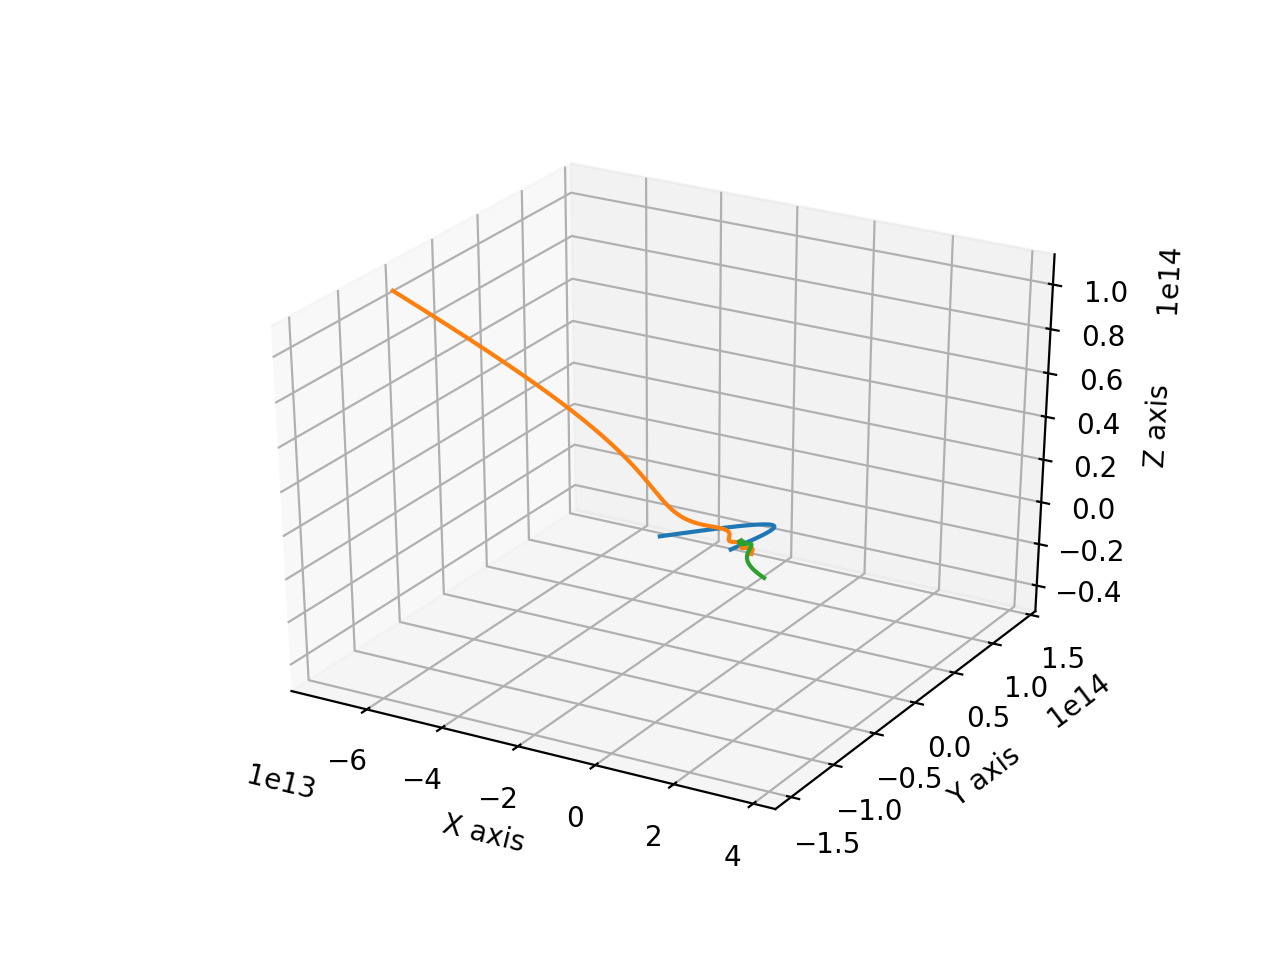

In [44]:
r1=r_nd*np.array([-0.5,0,0]) #m
r2=r_nd*np.array([0.5,0,0]) #m
r3=r_nd*np.array([0,0,1]) #m
v1=v_nd*np.array([0,1,0]) #m/s
v2=v_nd*np.array([0,0,1]) #m/s
v3=v_nd*np.array([0,-1,0]) #m/s

Ms= 1.989e+30
m1 = 1.5*Ms
m2 = 1*Ms
m3 = 2*Ms
a = np.concatenate((r1,r2,r3))
b = np.concatenate((v1,v2,v3))
c = np.array([m1,m2,m3])
r,v,t=RK4_solvern(POn,3,a,b,c,dt,N*6)

fig11 = plt.figure()
ax = fig11.gca(projection='3d')

ax.plot(r[0],r[1],r[2])
ax.plot(r[3],r[4],r[5])
ax.plot(r[6],r[7],r[8])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


Using the same initial conditions to the previous simulation we get a significantly different plots. It appears that the force looks almost repulsive. By deconstructing the function POn and printing certain values, it was apparent that the np.sum in the for loop did not sum the desired parts. In the following cell it is changed, as the sum is now done over the three values for x,y and z respectively.

In [46]:
def POn(r,v,m,n,t):
    """
    Imput value of position, velocity for 3 stars and time
    Output change in position and velocity for 3 stars and time
    """    
    dr = np.zeros((n*3))
    dv = np.zeros((n*3))
    dvij= np.zeros((n,n,3))
    
    for i in range(n):      
        dr[i*3:3*(i+1)] = v[i*3:3*(i+1)]
        for j in range(n):
            if (i == j):
                continue
            else:
                dvij[i,j] = G*m[j]*(r[j*3:3*(j+1)]-r[i*3:3*(i+1)])
                dvij[i,j] /=(np.linalg.norm(r[j*3:3*(j+1)]-r[i*3:3*(i+1)])**3)
                dv[i*3:3*(i+1)] += dvij[i,j]
    return np.array([dr,dv])

In [47]:
def RK4_solvern(fun,n,d,s,m,dt,N):
    """Solve d2r/dt2 = fun(r,v,t) using fourth-order RK method.    
    Inputs:
    fun     f(r,v,t)
    r,v     Initial location and velocity of n stars
    m       masses of n stars
    dt      Spacing in time
    N       Number of steps       
    Outputs:
    r    Locations of n star at every point in time
    v    Velocities of n star at every point in time
    t    array of each value of time in seconds
    """
    #creates two empty arrays with dimensions (3,N+1)
    r = np.zeros(3*n*(N+1)).reshape(3*n,N+1)
    v = np.zeros(3*n*(N+1)).reshape(3*n,N+1) 
    t = np.zeros(N+1)
    #imputs initial conditions into empty arrays
    for i in range(n*3):
            r[i][0] = d[i]
            v[i][0] = s[i]      
    #start of 4th order RK
    t[0] = 0
    valr= d
    valv= s    
    for i in range(N):
        #calculates the next value of r and v
        k1 = dt*fun(valr,valv,m,n,t[i])        
        k2 = dt*fun(valr+0.5*k1[0],valv+0.5*k1[1],m,n,t[i]+0.5*dt)     
        k3 = dt*fun(valr+0.5*k2[0],valv+0.5*k2[1],m,n,t[i]+0.5*dt)        
        k4 = dt*fun(valr+k3[0],valv+k3[1],m,n,t[i]+dt)        
        valr=valr+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        valv=valv+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        
        #adds value calculated to empty array
        for k in range(3*n):
            r[k][i+1] = valr[k]    
            v[k][i+1] = valv[k]
       
        t[i+1]=t[i]+dt
        
    return r, v, t

<IPython.core.display.Javascript object>


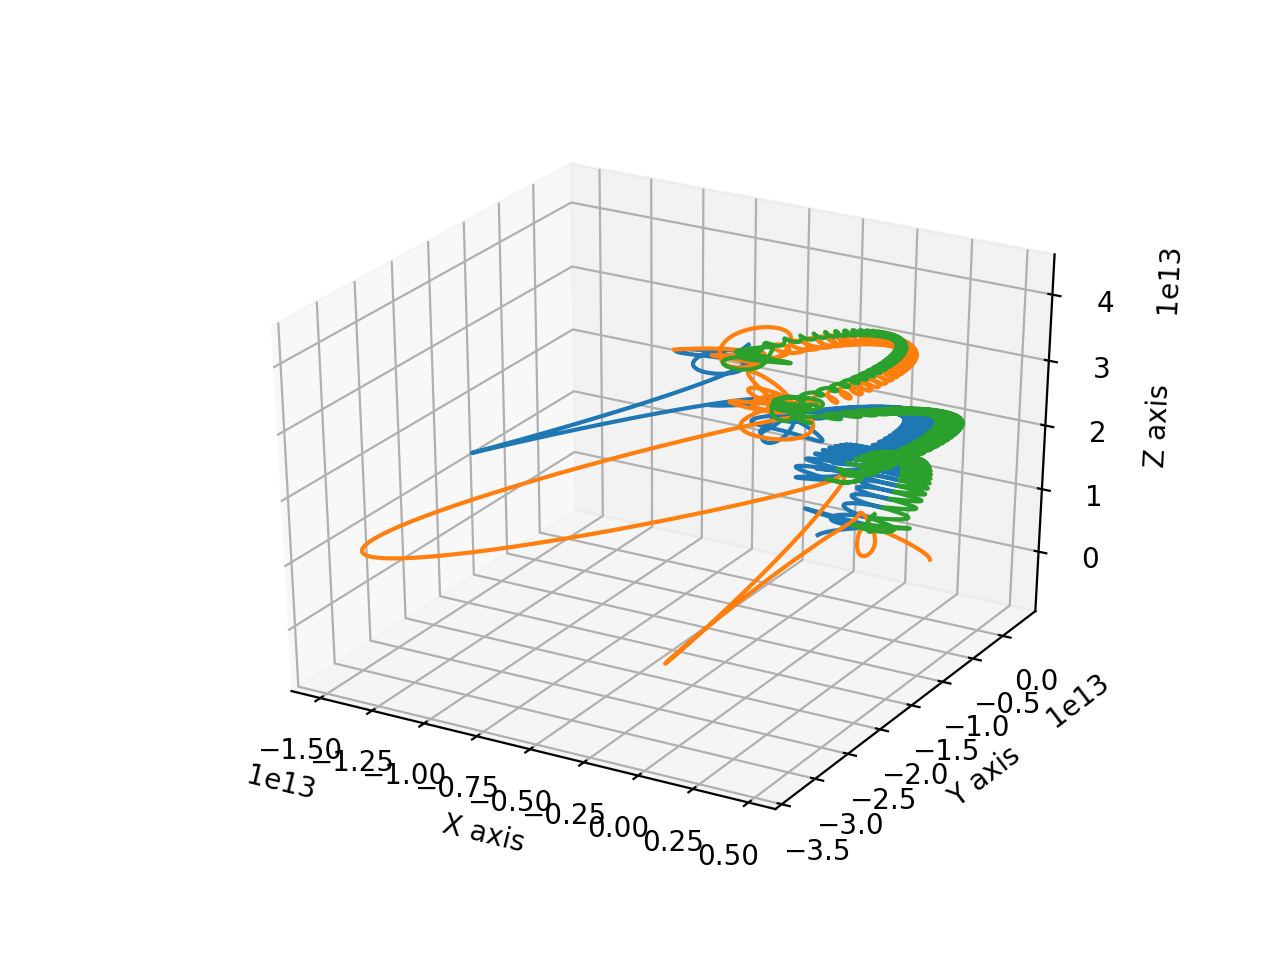

In [34]:
r,v,t=RK4_solvern(POn,3,a,b,c,dt,N*6)

fig12 = plt.figure()
ax = fig12.gca(projection='3d')

ax.plot(r[0],r[1],r[2])
ax.plot(r[3],r[4],r[5])
ax.plot(r[6],r[7],r[8])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

This plot is the same what was plotted using the three body system, meaning we can now start to simulate the interesting stable orbits. The plot made bellow where we have three stars of equal mass; two bodies orbiting around a third moving up in the middle pulling them both up, leaving a beautiful helical path. The idea which was brought up in group discussion [4]. 

<IPython.core.display.Javascript object>


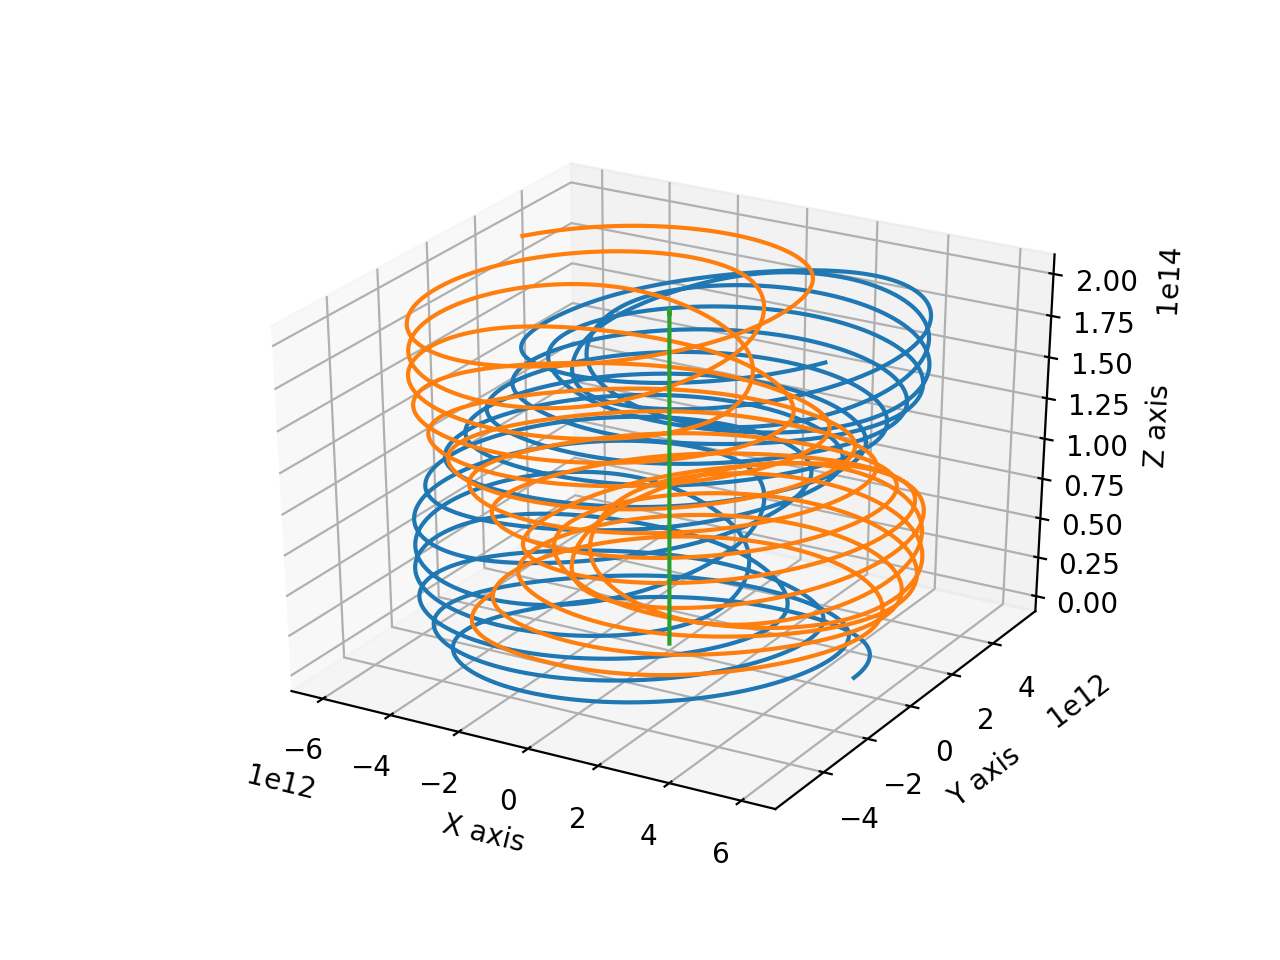

In [35]:
r1=r_nd*np.array([1,0,0]) #m
r2=r_nd*np.array([-1,0,0]) #m
r3=r_nd*np.array([0,0,-1]) #m
v1=v_nd*np.array([0,1,0]) #m/s
v2=v_nd*np.array([0,-1,0]) #m/s
v3=v_nd*np.array([0,0,2]) #m/s

Ms= 1.989e+30
m1 = 1*Ms
m2 = 1*Ms
m3 = 1*Ms

a = np.concatenate((r1,r2,r3))
b = np.concatenate((v1,v2,v3))
c = np.array([m1,m2,m3])
r,v,t=RK4_solvern(POn,3,a,b,c,dt,10*N)

fig13 = plt.figure()
ax = fig13.gca(projection='3d')

ax.plot(r[0],r[1],r[2])
ax.plot(r[3],r[4],r[5])
ax.plot(r[6],r[7],r[8])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

* [Back to Contents](#contents)

#  <a id="final"></a> Final Code
#### Date- 10/3/2020
Bellow are the few cells that are needed to produce models of any simulation desired.

In [2]:
#required imports

#to create an interactive plot
%matplotlib notebook  
from mpl_toolkits.mplot3d import Axes3D    #allows to create a 3D plot
import numpy as np                         #used to create arrays and opperate on them                
import matplotlib.pyplot as plt            #used to create a plot 

In [3]:
def POn(r,v,m,n,t):
    """
    Imput value of position, velocity for 3 stars and time
    Output change in position and velocity for 3 stars and time
    """    
    dr = np.zeros((n*3))
    dv = np.zeros((n*3))
    dvij= np.zeros((n,n,3))
    
    for i in range(n):      
        dr[i*3:3*(i+1)] = v[i*3:3*(i+1)]
        for j in range(n):
            if (i == j):
                continue
            else:
                dvij[i,j] = G*m[j]*(r[j*3:3*(j+1)]-r[i*3:3*(i+1)])
                dvij[i,j] /=(np.linalg.norm(r[j*3:3*(j+1)]-r[i*3:3*(i+1)])**3)
                dv[i*3:3*(i+1)] += dvij[i,j]
    return np.array([dr,dv])

In [4]:
def RK4_solvern(fun,n,d,s,m,dt,N):
    """Solve d2r/dt2 = fun(r,v,t) using fourth-order RK method.    
    Inputs:
    fun     f(r,v,t)
    r,v     Initial location and velocity of n stars
    m       masses of n stars
    dt      Spacing in time
    N       Number of steps       
    Outputs:
    r    Locations of n star at every point in time
    v    Velocities of n star at every point in time
    t    array of each value of time in seconds
    """
    #creates two empty arrays with dimensions (3,N+1)
    r = np.zeros(3*n*(N+1)).reshape(3*n,N+1)
    v = np.zeros(3*n*(N+1)).reshape(3*n,N+1) 
    t = np.zeros(N+1)
    #imputs initial conditions into empty arrays
    for i in range(n*3):
            r[i][0] = d[i]
            v[i][0] = s[i]       
    #start of 4th order RK
    t[0] = 0
    valr= d
    valv= s    
    for i in range(N):
        #calculates the next value of r and v
        k1 = dt*fun(valr,valv,m,n,t[i])        
        k2 = dt*fun(valr+0.5*k1[0],valv+0.5*k1[1],m,n,t[i]+0.5*dt)     
        k3 = dt*fun(valr+0.5*k2[0],valv+0.5*k2[1],m,n,t[i]+0.5*dt)        
        k4 = dt*fun(valr+k3[0],valv+k3[1],m,n,t[i]+dt)        
        valr=valr+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        valv=valv+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        
        #adds value calculated to empty array
        for k in range(3*n):
            r[k][i+1] = valr[k]    
            v[k][i+1] = valv[k]
       
        t[i+1]=t[i]+dt
        
    return r, v, t

In [5]:
def PLT(r,n):
    """
    Plots a system of n stars
    Input: r as out put of Rk4-solvern and number of stars
    Output: 3d plot of orbit of stars
    """
    fig1 = plt.figure()
    ax = fig1.gca(projection='3d')
    for i in range(n):
            ax.plot(r[i*3],r[i*3+1],r[i*3+2])

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    return plt.show()
    

In [6]:
#Constant
G    = 6.67408e-11                 #N-m2/kg2 Newtons

#Reference quantities
Ms   = 1.989e+30                  #kg   mass of the sun
r_nd = 5.326e+12                  #m    distance between stars in Alpha Centuri
v_nd = 3000                       #m/s  relative velocity of earth around the sun
t_nd = 8*79.91*365*24*3600*0.51   #s    orbital period of Alpha Centauri
dt   = 24*60*60*7                 #dt   1 day
N    = int(t_nd/dt)               #     number of steps

In the cell bellow is how to set up any simulation using the functions and imports shown previously. It uses a 3 body simulation as an example but explains how to change it for different simulations.

<IPython.core.display.Javascript object>


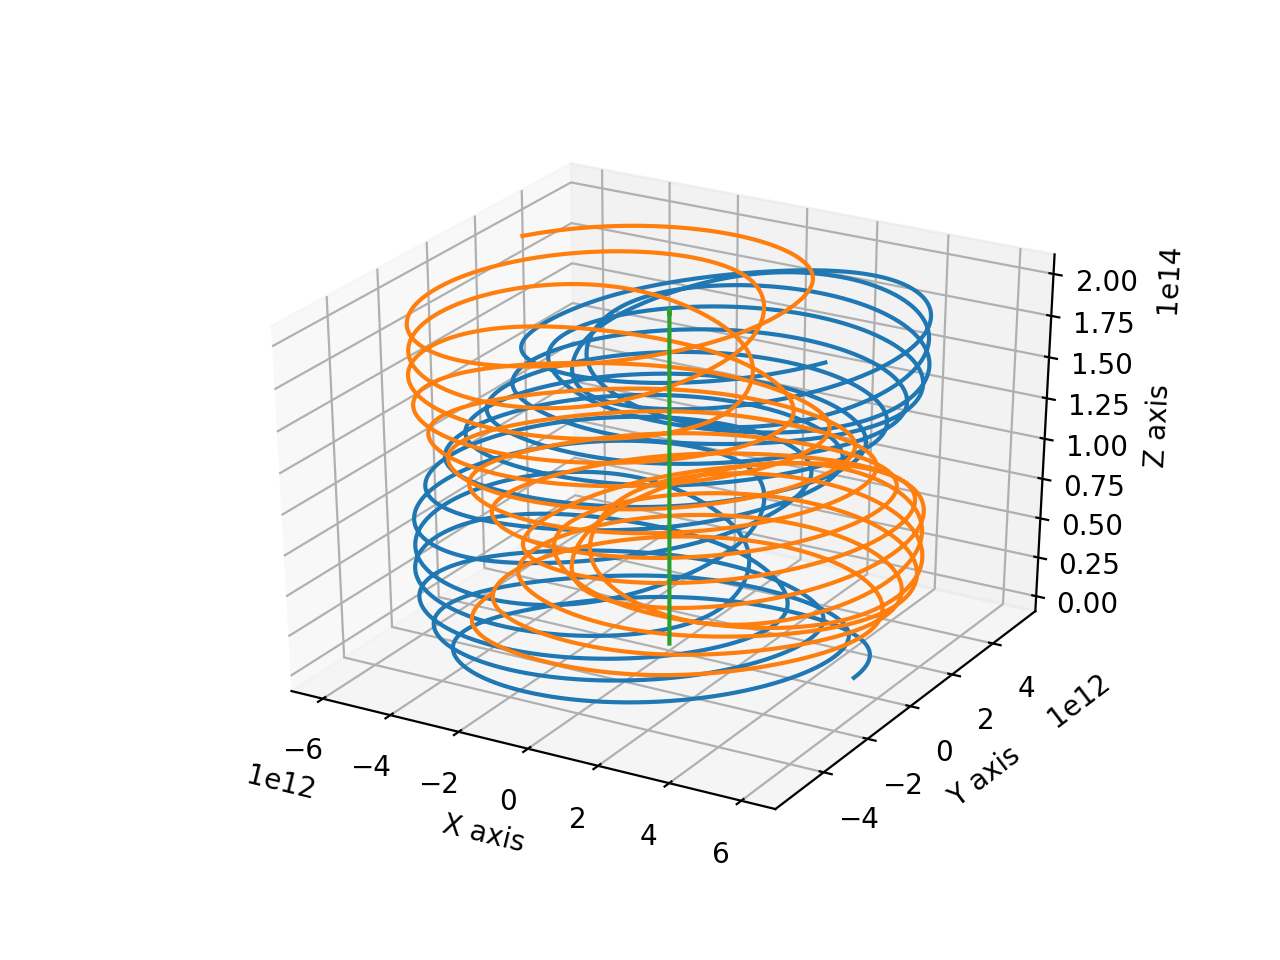

In [44]:
#Number of Bodies
bod = 3

#Initial possition of bodies (each body needs its own starting position)
r1=r_nd*np.array([1,0,0])  #m
r2=r_nd*np.array([-1,0,0]) #m
r3=r_nd*np.array([0,0,-1]) #m

#Initial velocities of bodies (each body needs its own starting velocity)
v1=v_nd*np.array([0,1,0])  #m/s
v2=v_nd*np.array([0,-1,0]) #m/s
v3=v_nd*np.array([0,0,2])  #m/s

#Mass of bodies 
m1 = 1*Ms #kg
m2 = 1*Ms #kg
m3 = 1*Ms #kg

#Formats initial conditions so they can be used in the function each body needs an input even if values are the same 
a = np.concatenate((r1,r2,r3))
b = np.concatenate((v1,v2,v3))
c = np.array([m1,m2,m3])

#solves the second order differential equations
r,v,t=RK4_solvern(POn,bod,a,b,c,dt,int(10*N))

#plots solutions
PLT(r,bod)

* [Back to Contents](#contents)

# <a id="sols"></a> Solutions
#### Date- 9/3/2020
In the following segment we are going to try and find stable solutions, using the three classes of Newtonian three-body planar periodic orbit [5] we will try and reproduce their solutions. The initial conditions have been formatted so that the intial possitions are all the same, and the velocities are can be described in terms of the motion of one of the bodies velocity. 

In [48]:
#Constant
G=1
bod =3
#Reference quantities
Ms   = 1                 #kg   mass of the sun
r_nd = 1                 #m    distance between stars in Alpha Centuri
v_nd = 1                 #m/s  relative velocity of earth around the sun



def rep_res(xdot1,ydot1,T):
    """
    Input: initial velocities and period of orbit
    Output: a plot of the orbits of the three bodies
    """
    t_nd = T                   #s    orbital period of Alpha Centauri
    dt   = 0.0001           #dt   1 day if this is reduced enough all plots work
    N    = int(t_nd/dt)      #     number of steps 
    
    r1=r_nd*np.array([-1,0,0]) #m
    r2=r_nd*np.array([1,0,0]) #m
    r3=r_nd*np.array([0,0,0]) #m 
    
    v1=r_nd*np.array([xdot1,ydot1,0])
    v2=v_nd*np.array([xdot1,ydot1,0])
    v3=v_nd*np.array([-2*xdot1,-2*ydot1,0])
    
    m1 = 1*Ms
    m2 = 1*Ms
    m3 = 1*Ms   
    a = np.concatenate((r1,r2,r3))
    b = np.concatenate((v1,v2,v3))
    c = np.array([m1,m2,m3]) 
    r,v,t= RK4_solvern(POn,bod,a,b,c,dt,N)  
    return PLT(r,bod)

<IPython.core.display.Javascript object>


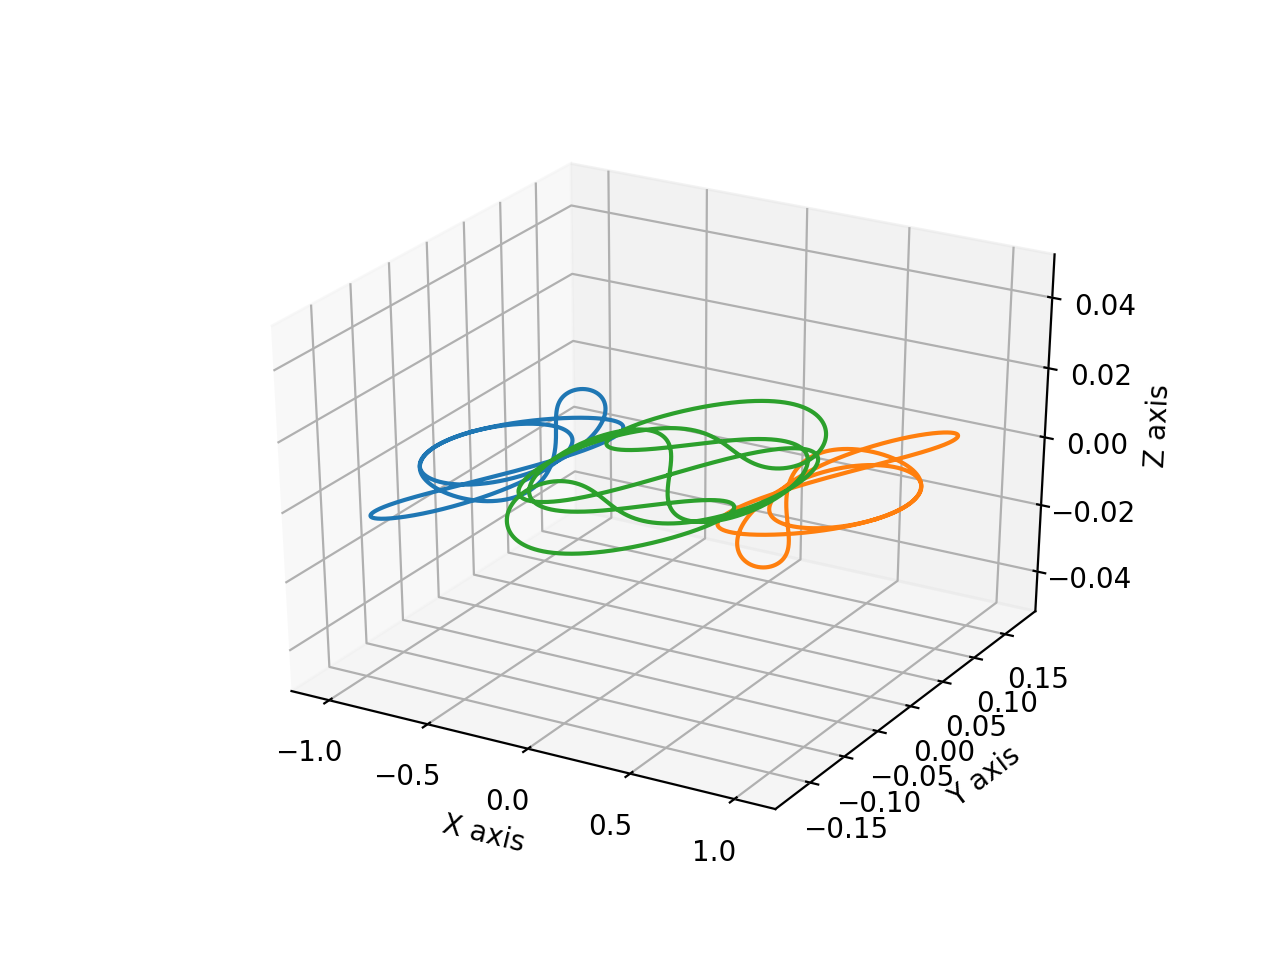

In [49]:
#I.A.1 butterfly I
rep_res(0.30689,0.12551,6.2356)

<IPython.core.display.Javascript object>


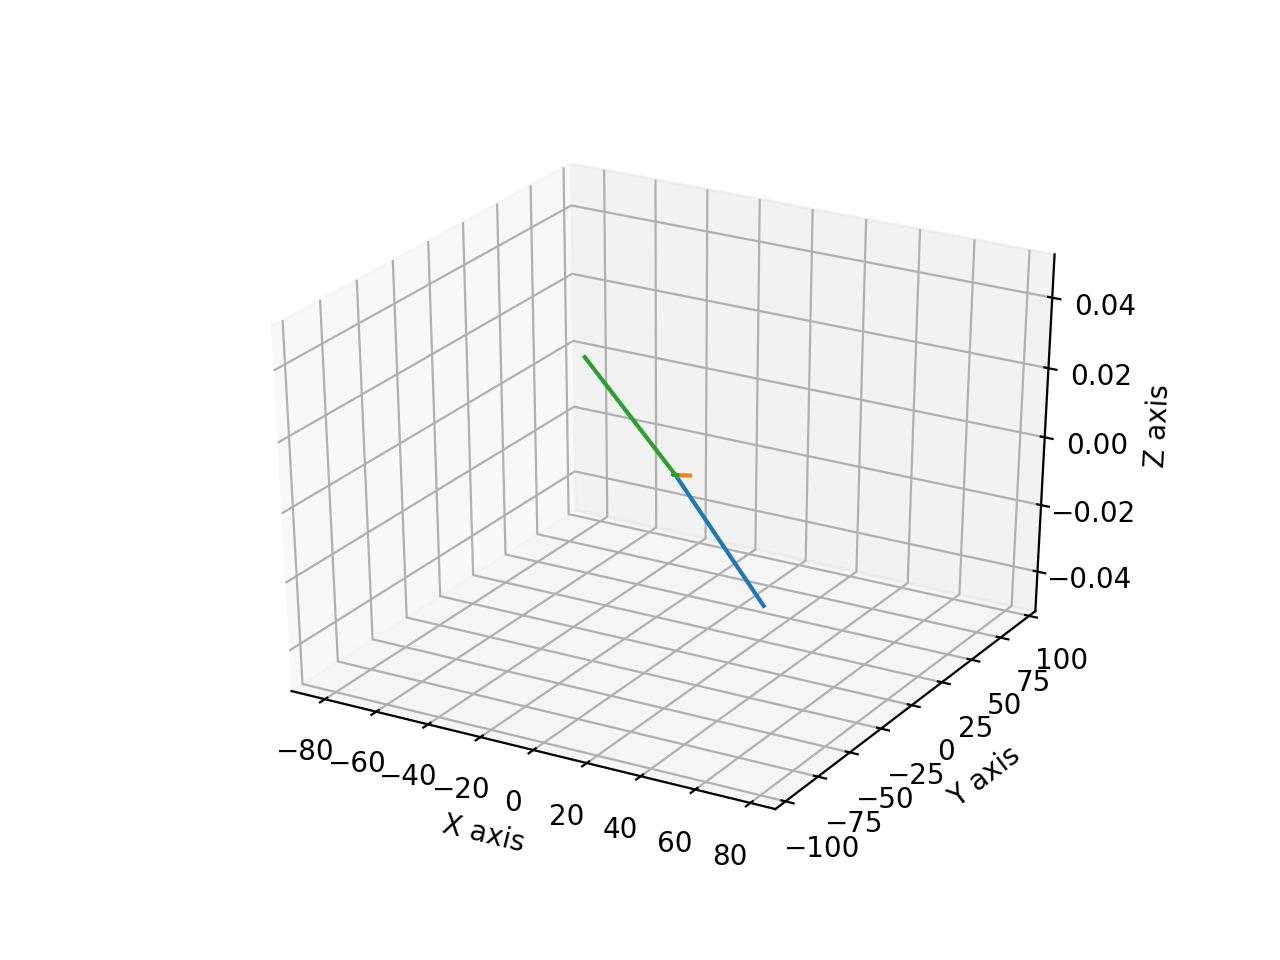

In [50]:
#I.A.2 butterfly II
rep_res(0.39295,0.09758,7.0039)

<IPython.core.display.Javascript object>


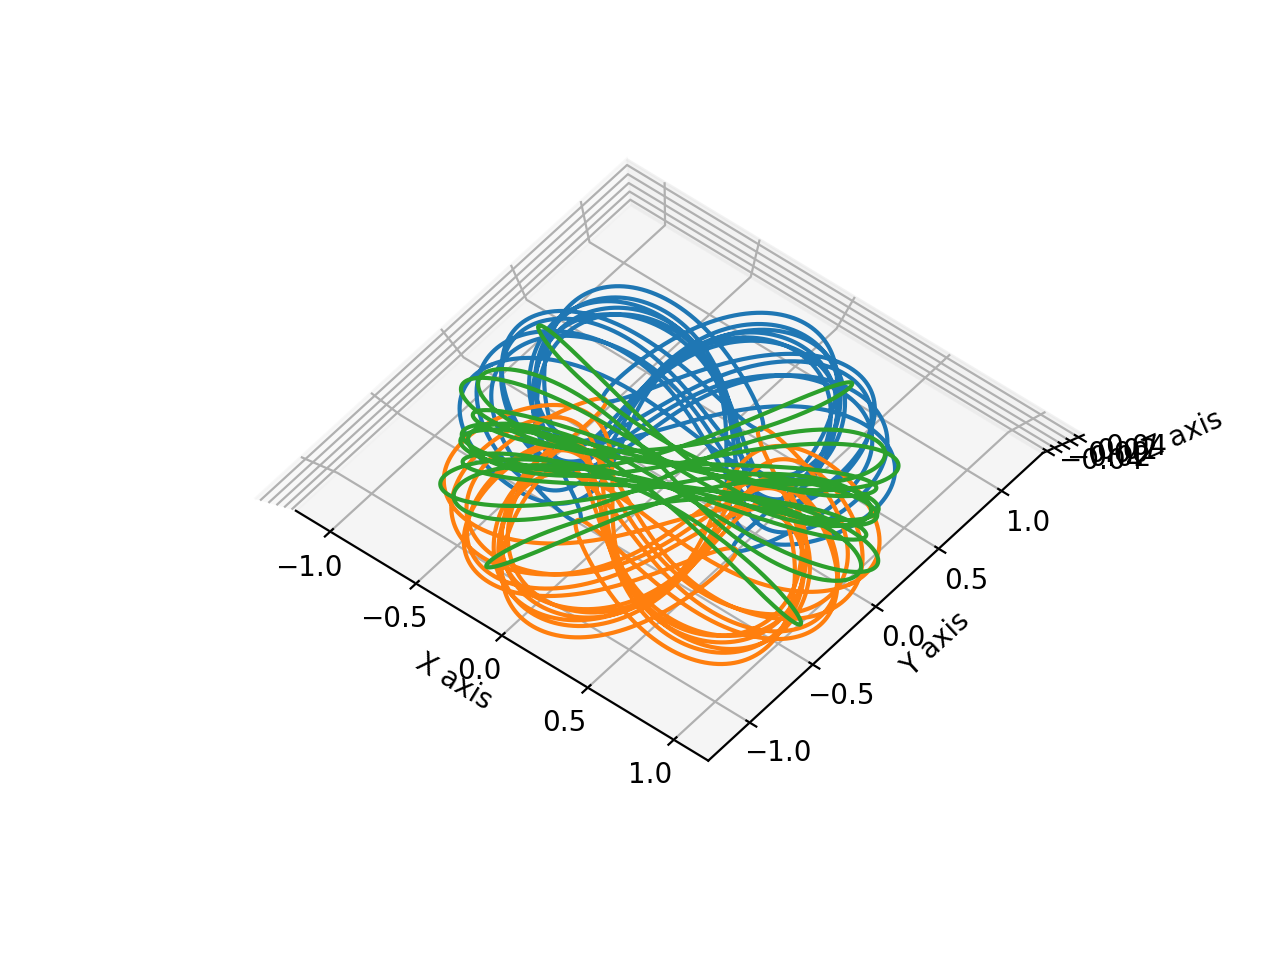

In [51]:
#I.A.3 bumblebee
rep_res(0.18428,0.58719,63.5345)

<IPython.core.display.Javascript object>


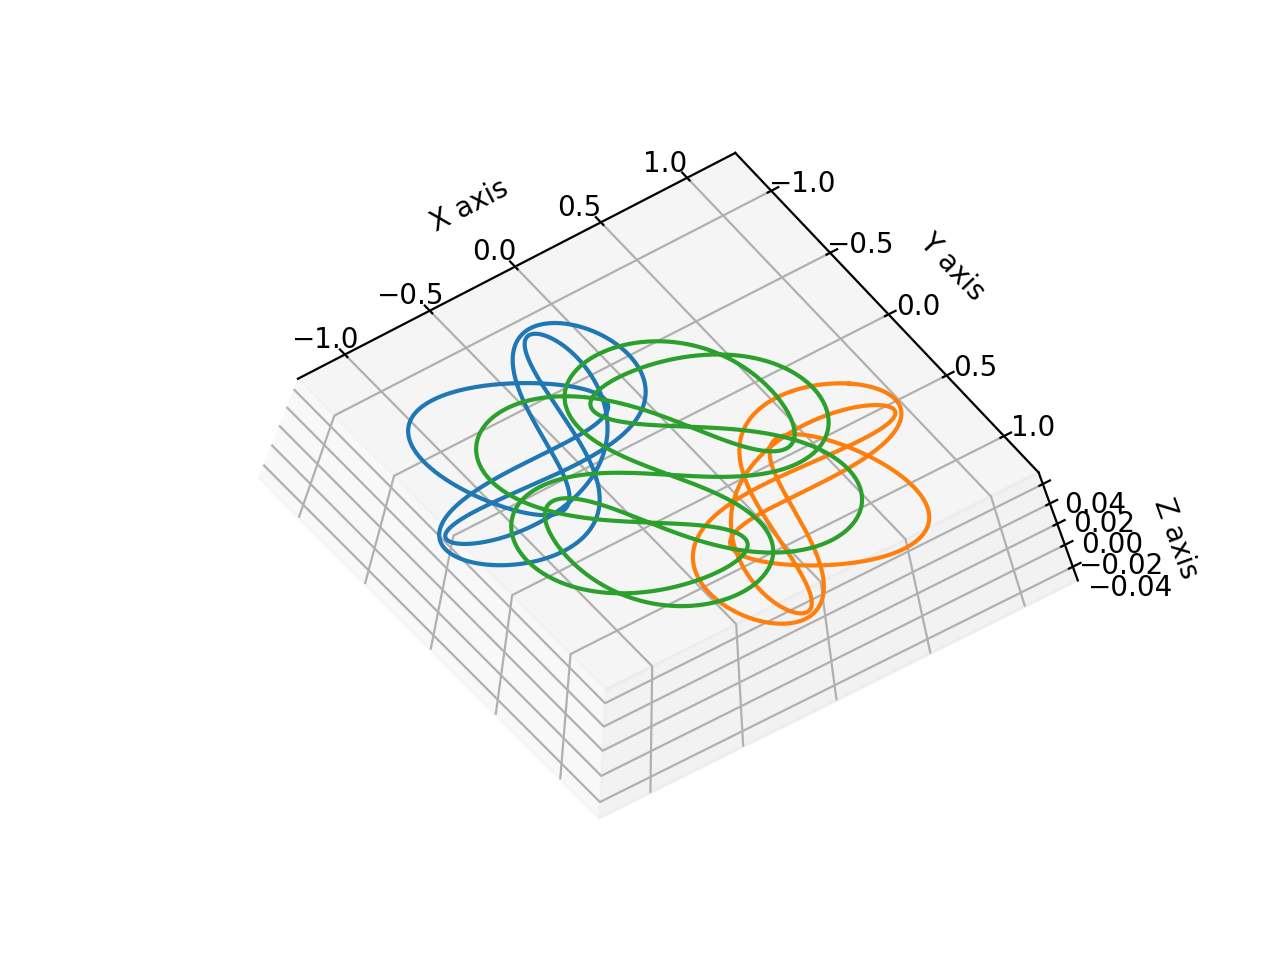

In [52]:
#I.B.1 moth I
rep_res(0.46444,0.39606,14.8939)

<IPython.core.display.Javascript object>


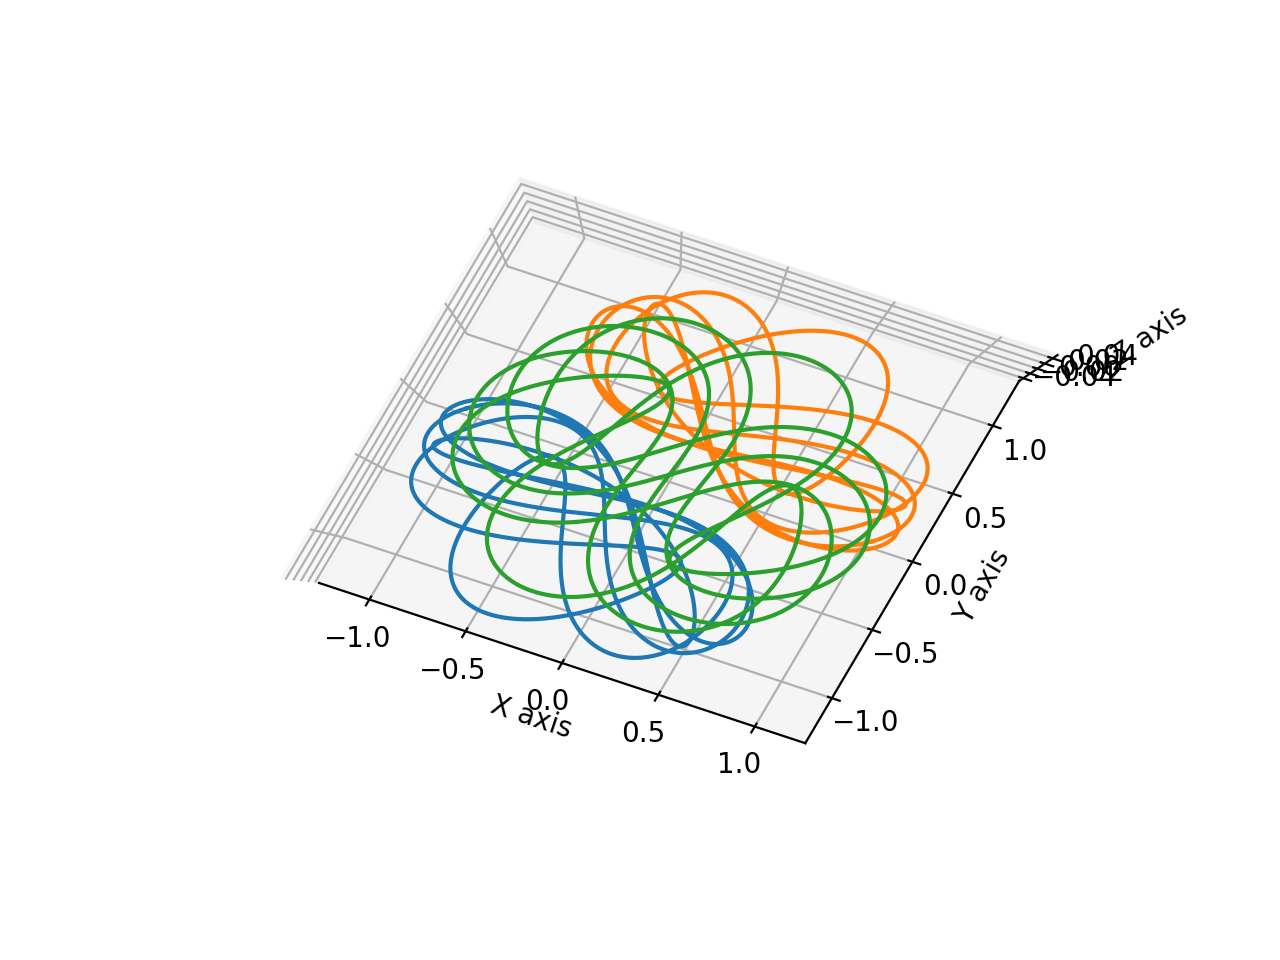

In [53]:
#I.B.2 moth II
rep_res(0.43917,0.45297,28.6703)

<IPython.core.display.Javascript object>


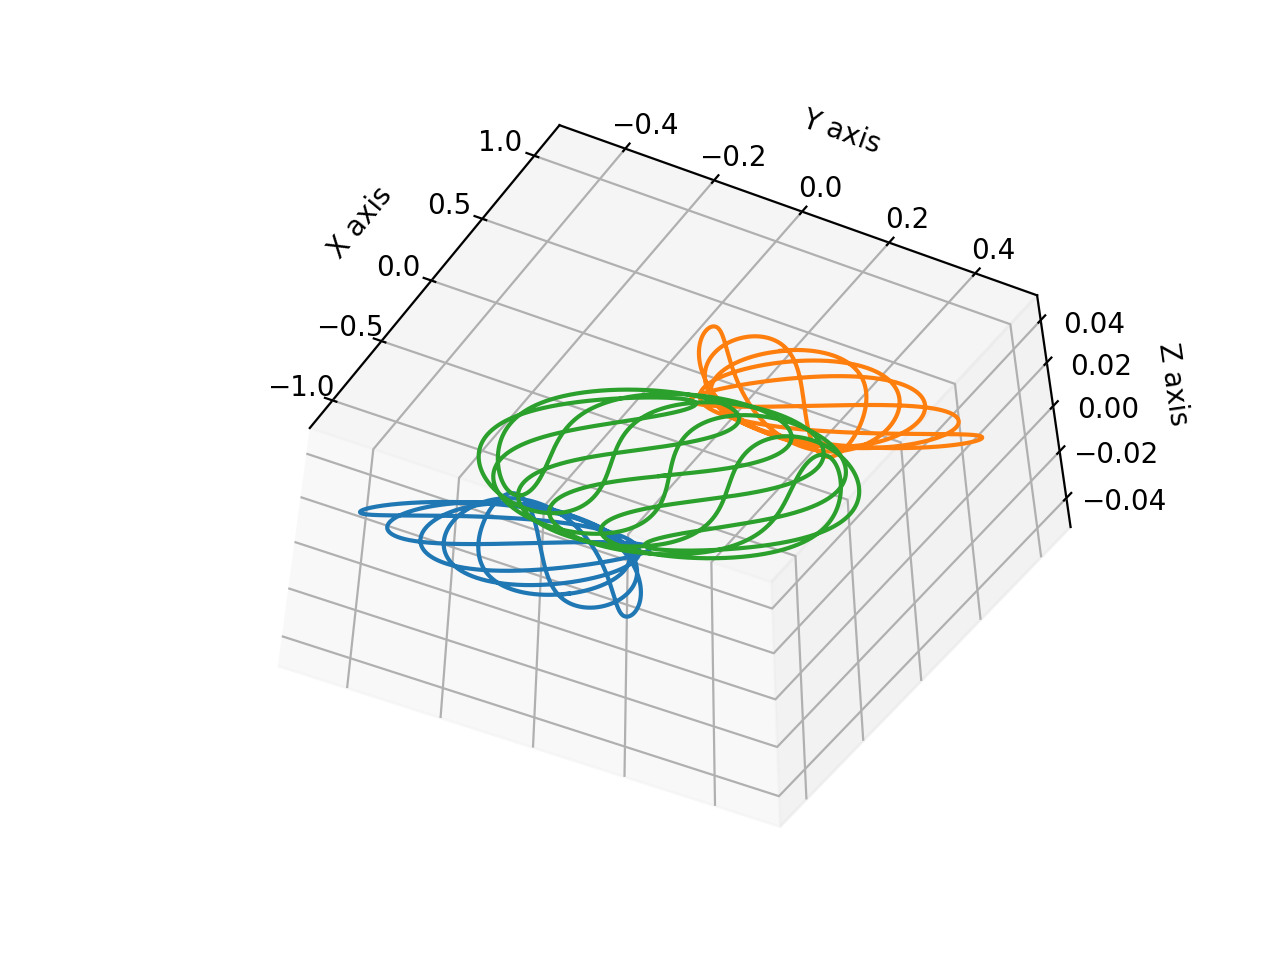

In [54]:
#I.B.3 butterfly III
rep_res(0.40592,0.23016,13.8658)

<IPython.core.display.Javascript object>


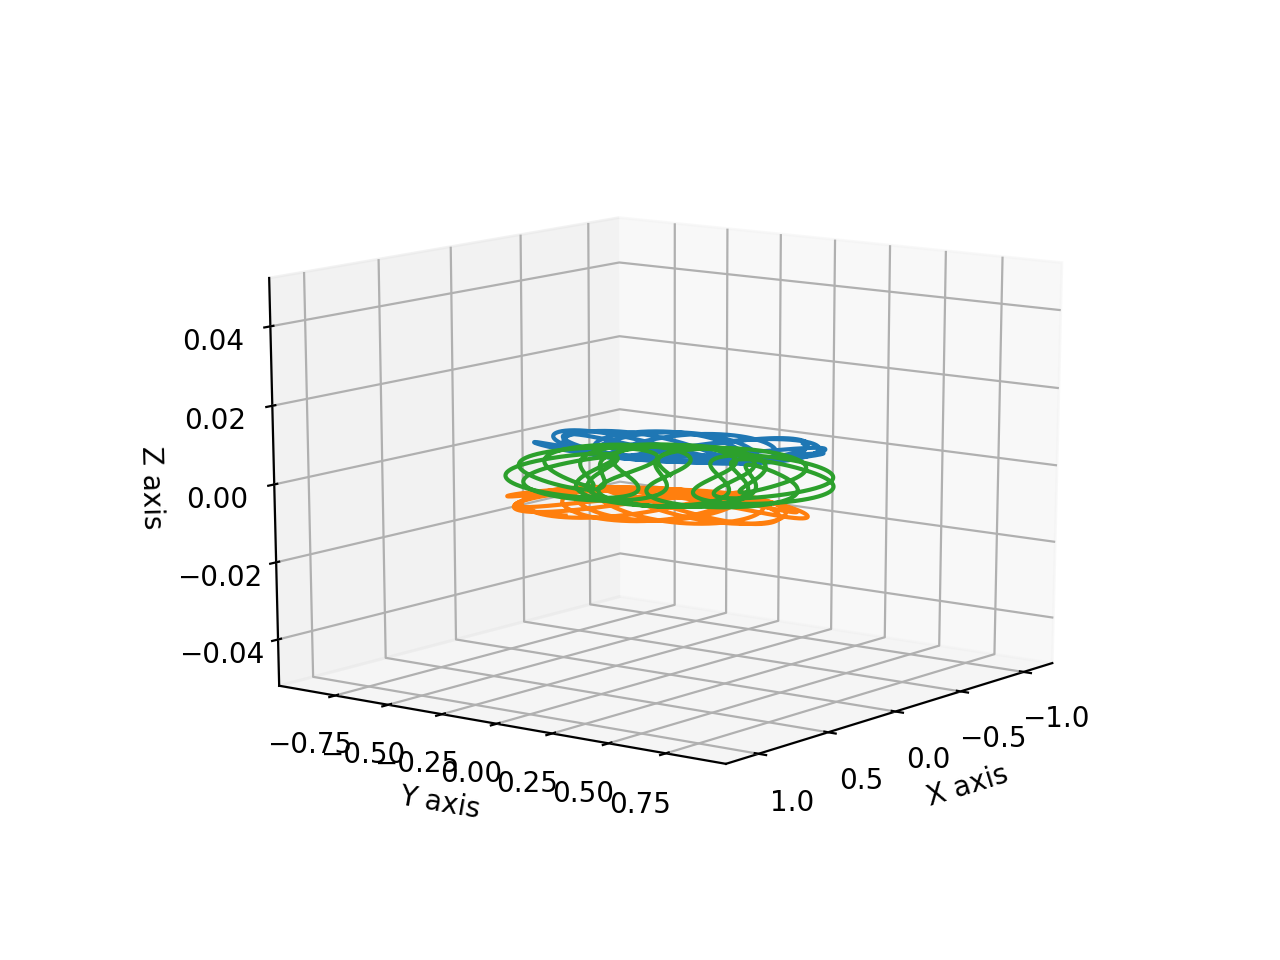

In [56]:
#I.B.4 moth III
rep_res(0.38344,0.37736,25.8406)

<IPython.core.display.Javascript object>


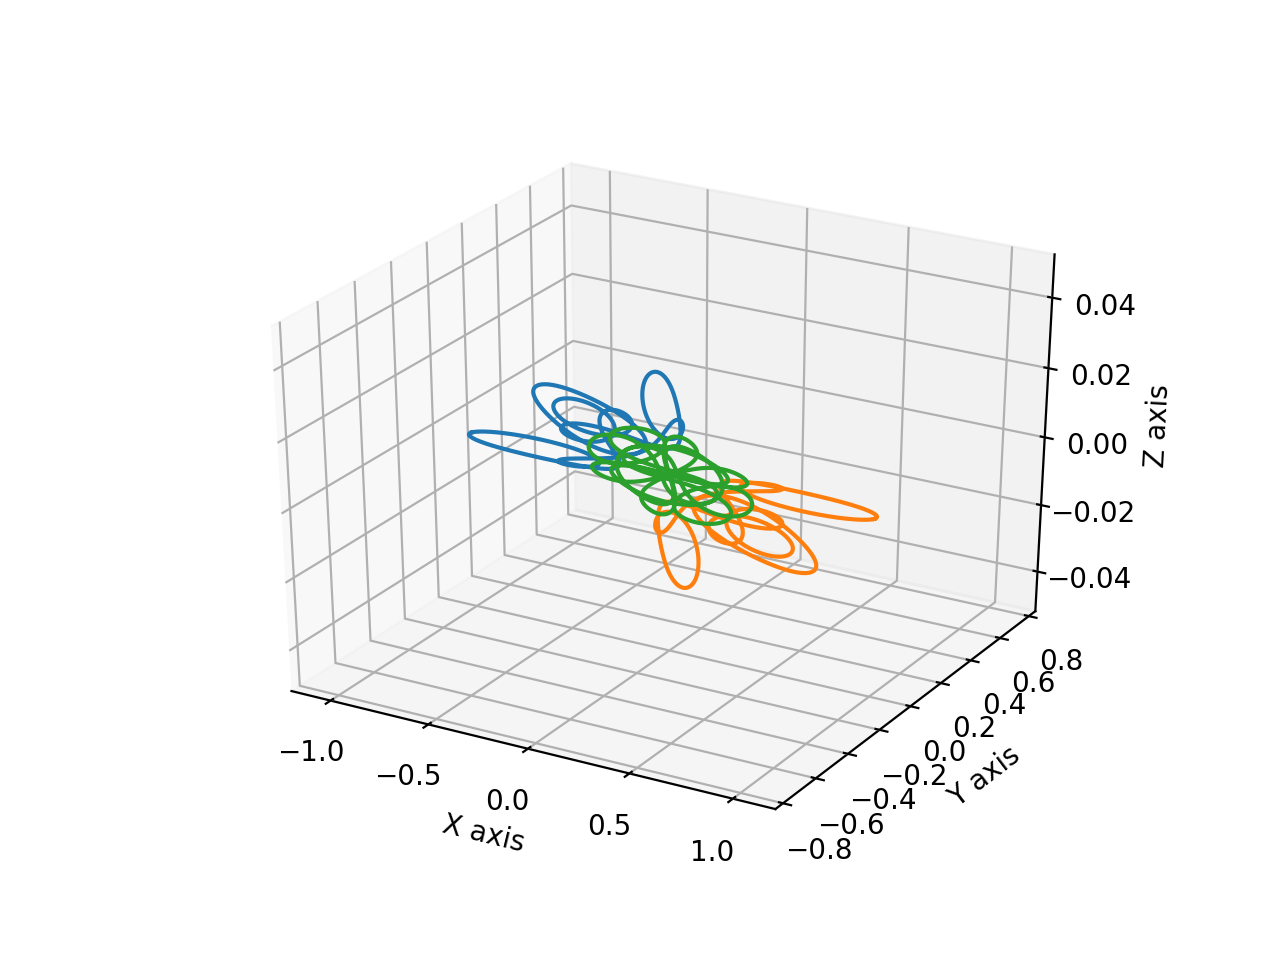

In [57]:
#I.B.5 goggles
rep_res(0.08330,0.12789,10.466)

In [ ]:
#I.B.6 butterfly IV
rep_res(0.350112,0.07934,79.4759)

<IPython.core.display.Javascript object>


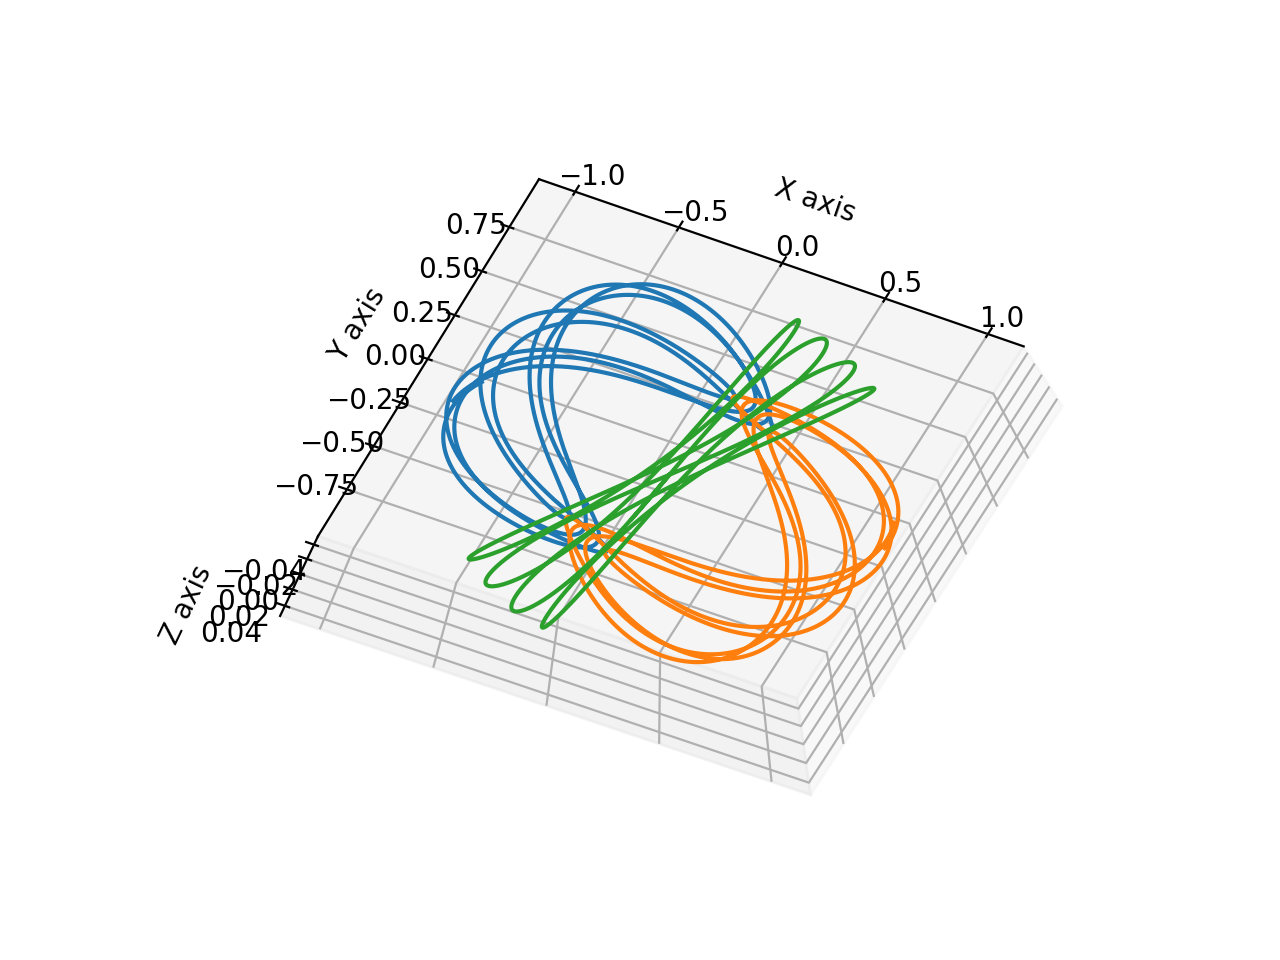

In [58]:
#I.B.7 dragonfly
rep_res(0.08058,0.58884,21.2710)

In [ ]:
#II.B.1 yarn
rep_res(0.55906,0.34919,55.5018)

<IPython.core.display.Javascript object>


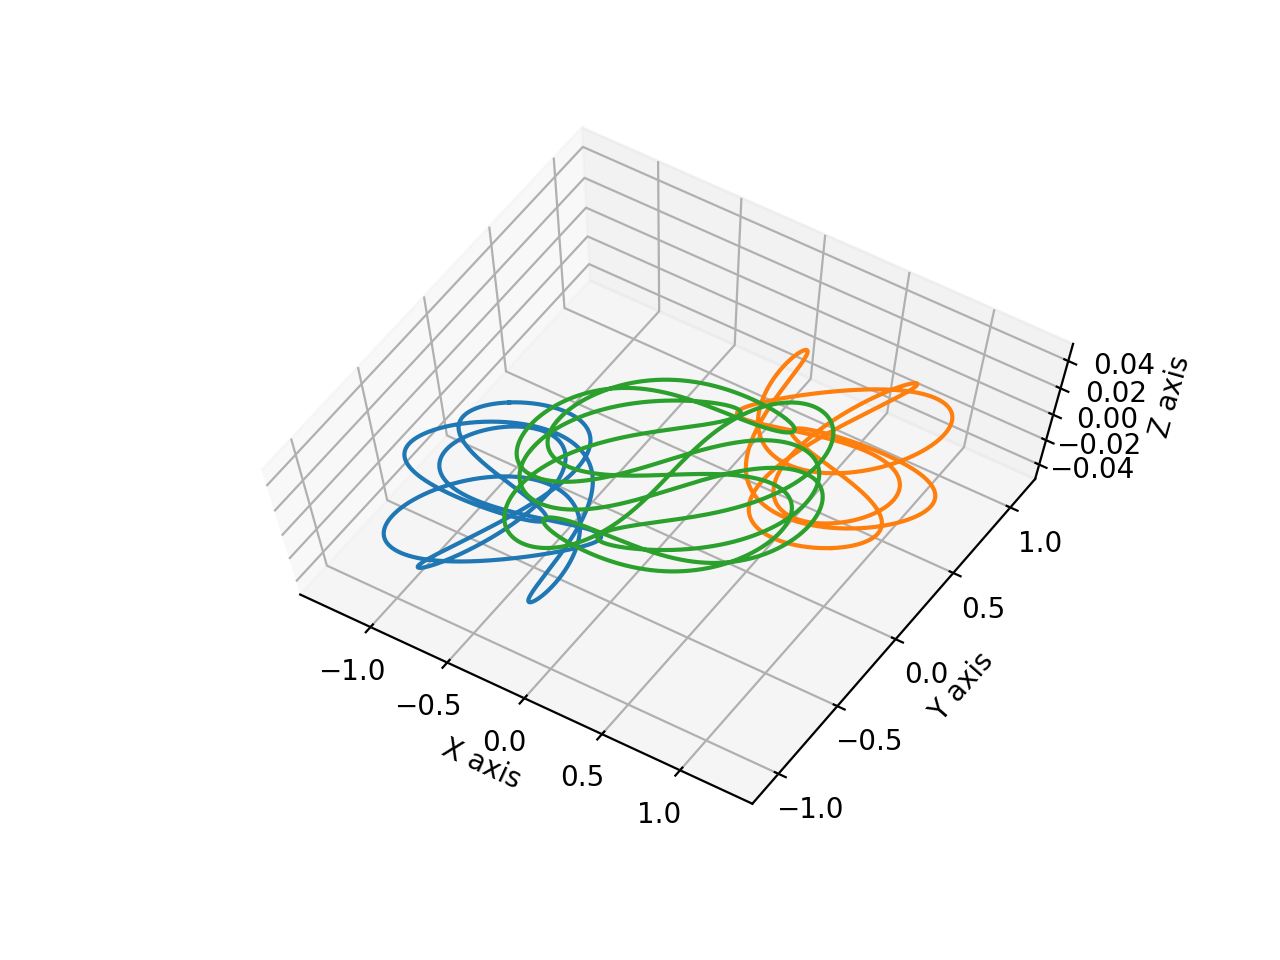

In [59]:
#II.C.2a yin-yang I
rep_res(0.51394,0.30474,17.3284)

<IPython.core.display.Javascript object>


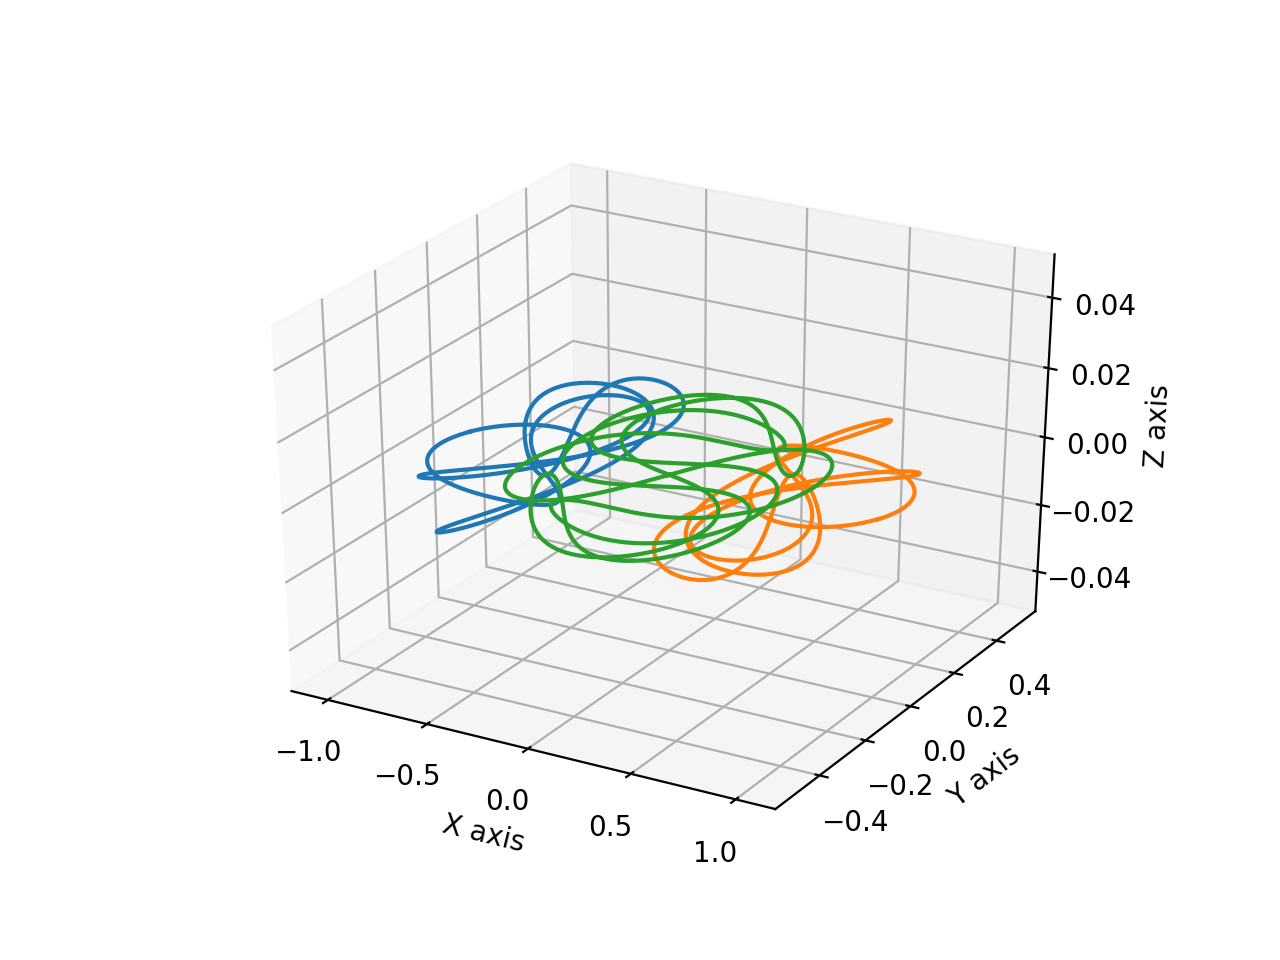

In [60]:
#II.C.2b yin-yang I
rep_res(0.28270,0.32721,10.9626)

In [ ]:
#II.C.3a yin-yang II
rep_res(0.41682,0.33033,55.7898)

In [ ]:
#II.C.3b yin-yang II
rep_res(0.41734,0.31310,54.2076)

* [Back to Contents](#contents)

# <a id="biblo"></a> Bibliography

* [1] Gaurav Deshmukh. Modelling the Three Body Problem in Classical Mechanics using Python [online] (2 July 2019)
* [2] D. Williams. Earth Fact Sheet [online]. NASA
* [3] D. Williams. Sun Fact Sheet [online]. NASA
* [4] Colleague in group project, during group discussion on 4th of March
* [5] Milovan Šuvakov and V. Dmitrašinovic ́. Three classes of Newtonian three-body planar periodic orbits. Phys. Rev. Lett., 110(11):114301, March 2013. 
* [6] R. Vanderbei. New Orbits for the n-body problem Ann. N.Y. Acad. Sci. 1017, 422 (2004)
* [7] C. Moore. Braids in Classical Dynamics Phys. Rev. Lett. 70. 3675 (1993). 
* [8] R. ALLAIN. This Is the Only Way to Solve the Three-Body Problem [online]. (2016)

* [Back to Contents](#contents)